<h1 style="text-align:center;">Analyse des Données de Taxis Jaunes (2017)</h1>

<div>  
    <h3>Contexte</h3>  
    <p>  
        Les pourboires représentent une part significative des revenus des chauffeurs de taxi à New York. Comprendre les facteurs qui
        influencent la générosité des clients permet d’optimiser les stratégies de service, tout en garantissant un accès équitable aux taxis.  
    </p>  

<h3>Objectif Principal</h3>  
<p>  
    Construire un modèle prédictif pour identifier les clients susceptibles de donner un pourboire ≥ 20% du montant total de la course.  
</p>  

<h3>Jeu de Données</h3>  
<ul>  
    <li><strong>2017_Yellow_Taxi_Trip_Data</strong> : Historique de courses avec des variables comme <em>fare_amount</em>, <em>tip_amount</em>, <em>trip_distance</em>, <em>payment_type</em>, etc.</li>  
</ul>

<h3>Hypothèses à Tester</h3>
<ul>  
    <li>H1 : Les clients payant par carte sont plus généreux que ceux payant en espèces.</li>
    <li>H2 : Les courses longues distances (> 10 miles) ont des pourboires proportionnellement plus élevés</li>  
    <li>H3 : Les trajets vers les aéroports (RatecodeID=2) ont un taux de générosité différent.</li>  
</ul>

<h5><strong>Citation</strong></h5>
<p>Le pourboire développe l'amitié</p>
</div>  

# Analyse exploratoire des données (EDA)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [125]:

data=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [127]:
datatrainset, datatestset =train_test_split(data,test_size=0.2,random_state=0)

In [129]:
datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18159 entries, 252 to 2732
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             18159 non-null  int64  
 1   VendorID               18159 non-null  int64  
 2   tpep_pickup_datetime   18159 non-null  object 
 3   tpep_dropoff_datetime  18159 non-null  object 
 4   passenger_count        18159 non-null  int64  
 5   trip_distance          18159 non-null  float64
 6   RatecodeID             18159 non-null  int64  
 7   store_and_fwd_flag     18159 non-null  object 
 8   PULocationID           18159 non-null  int64  
 9   DOLocationID           18159 non-null  int64  
 10  payment_type           18159 non-null  int64  
 11  fare_amount            18159 non-null  float64
 12  extra                  18159 non-null  float64
 13  mta_tax                18159 non-null  float64
 14  tip_amount             18159 non-null  float64
 15  tolls_

In [131]:
datatrainset.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
252,31150737,2,04/16/2017 11:08:31 PM,04/16/2017 11:24:44 PM,1,6.02,1,N,229,168,2,19.50,0.50,0.50,0.00,0.00,0.30,20.80
16220,33778519,2,04/24/2017 6:52:50 AM,04/24/2017 6:55:51 AM,1,0.66,1,N,249,114,1,4.50,0.00,0.50,1.00,0.00,0.30,6.30
9795,43955786,1,05/21/2017 2:36:49 AM,05/21/2017 2:42:24 AM,2,1.40,1,N,114,231,1,6.50,0.50,0.50,1.00,0.00,0.30,8.80
1972,2275196,1,01/09/2017 4:38:25 PM,01/09/2017 4:43:11 PM,1,0.50,1,N,75,236,1,5.00,1.00,0.50,0.00,0.00,0.30,6.80
21092,52138948,1,06/19/2017 6:45:25 PM,06/19/2017 6:54:12 PM,1,1.00,1,N,163,142,1,7.50,1.00,0.50,1.85,0.00,0.30,11.15
8744,50955881,2,06/16/2017 10:37:45 AM,06/16/2017 11:01:39 AM,2,2.52,1,N,100,144,1,15.50,0.00,0.50,3.26,0.00,0.30,19.56
3420,20785596,1,03/12/2017 8:18:28 PM,03/12/2017 8:23:59 PM,1,1.10,1,N,163,142,2,6.00,0.50,0.50,0.00,0.00,0.30,7.30
14413,92435973,2,11/01/2017 9:30:09 PM,11/01/2017 9:30:16 PM,1,0.44,2,N,141,162,1,52.00,0.00,0.50,13.20,0.00,0.30,66.00
212,64353574,2,07/29/2017 1:22:34 PM,07/29/2017 1:49:07 PM,1,4.93,1,N,114,236,1,20.00,0.00,0.50,2.00,0.00,0.30,22.80
5190,34386539,1,04/25/2017 9:36:17 PM,04/25/2017 9:57:07 PM,1,7.50,1,N,140,13,1,24.00,0.50,0.50,3.00,0.00,0.30,28.30


In [133]:
datatrainset.shape

(18159, 18)

In [135]:
datatrainset.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [137]:
pd.set_option('display.float_format', '{:.2f}'.format)
datatrainset.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00
mean,56743482.37,1.56,1.65,2.91,1.05,162.48,161.86,1.34,13.04,0.33,0.50,1.85,0.32,0.30,16.34
std,32807522.26,0.50,1.29,3.67,0.78,66.75,70.12,0.50,13.78,0.46,0.04,2.91,1.42,0.02,16.74
min,16803.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,28216951.00,1.00,1.00,0.98,1.00,114.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.58
50%,56804905.00,2.00,1.00,1.60,1.00,162.00,162.00,1.00,9.50,0.00,0.50,1.36,0.00,0.30,11.80
75%,85368354.50,2.00,2.00,3.05,1.00,233.00,233.00,2.00,14.50,0.50,0.50,2.45,0.00,0.30,17.80
max,113486300.00,2.00,6.00,33.92,99.00,265.00,265.00,4.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29


#### Problèmes Identifiés

- Valeurs négatives (fare_amount, total_amount) : Remboursements ou erreurs.

- Valeurs extrêmes (RatecodeID=99, fare_amount=999.99) : Probables anomalies.

- Données manquantes : Toutes les colonnes ont 18 159 lignes (count), donc pas de NaN ici.

## Types de données

In [141]:
datatrainset.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [143]:
# Afficher le nombre de colonnes par type
print("Types de données :\n\n", datatrainset.dtypes.value_counts())

Types de données :

 float64    8
int64      7
object     3
Name: count, dtype: int64


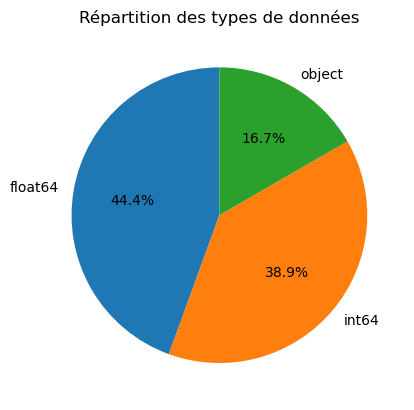

In [145]:
datatrainset.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types de données")
plt.ylabel("")
plt.show()

Ce graphique montre la répartition des types de données dans un dataset, avec une dominance de float64 (44.4%) et int64 (38.9%), suivi de object.

## Données manquantes (même si complètes, c'est bien de le confirmer !)

In [149]:
!pip install missingno

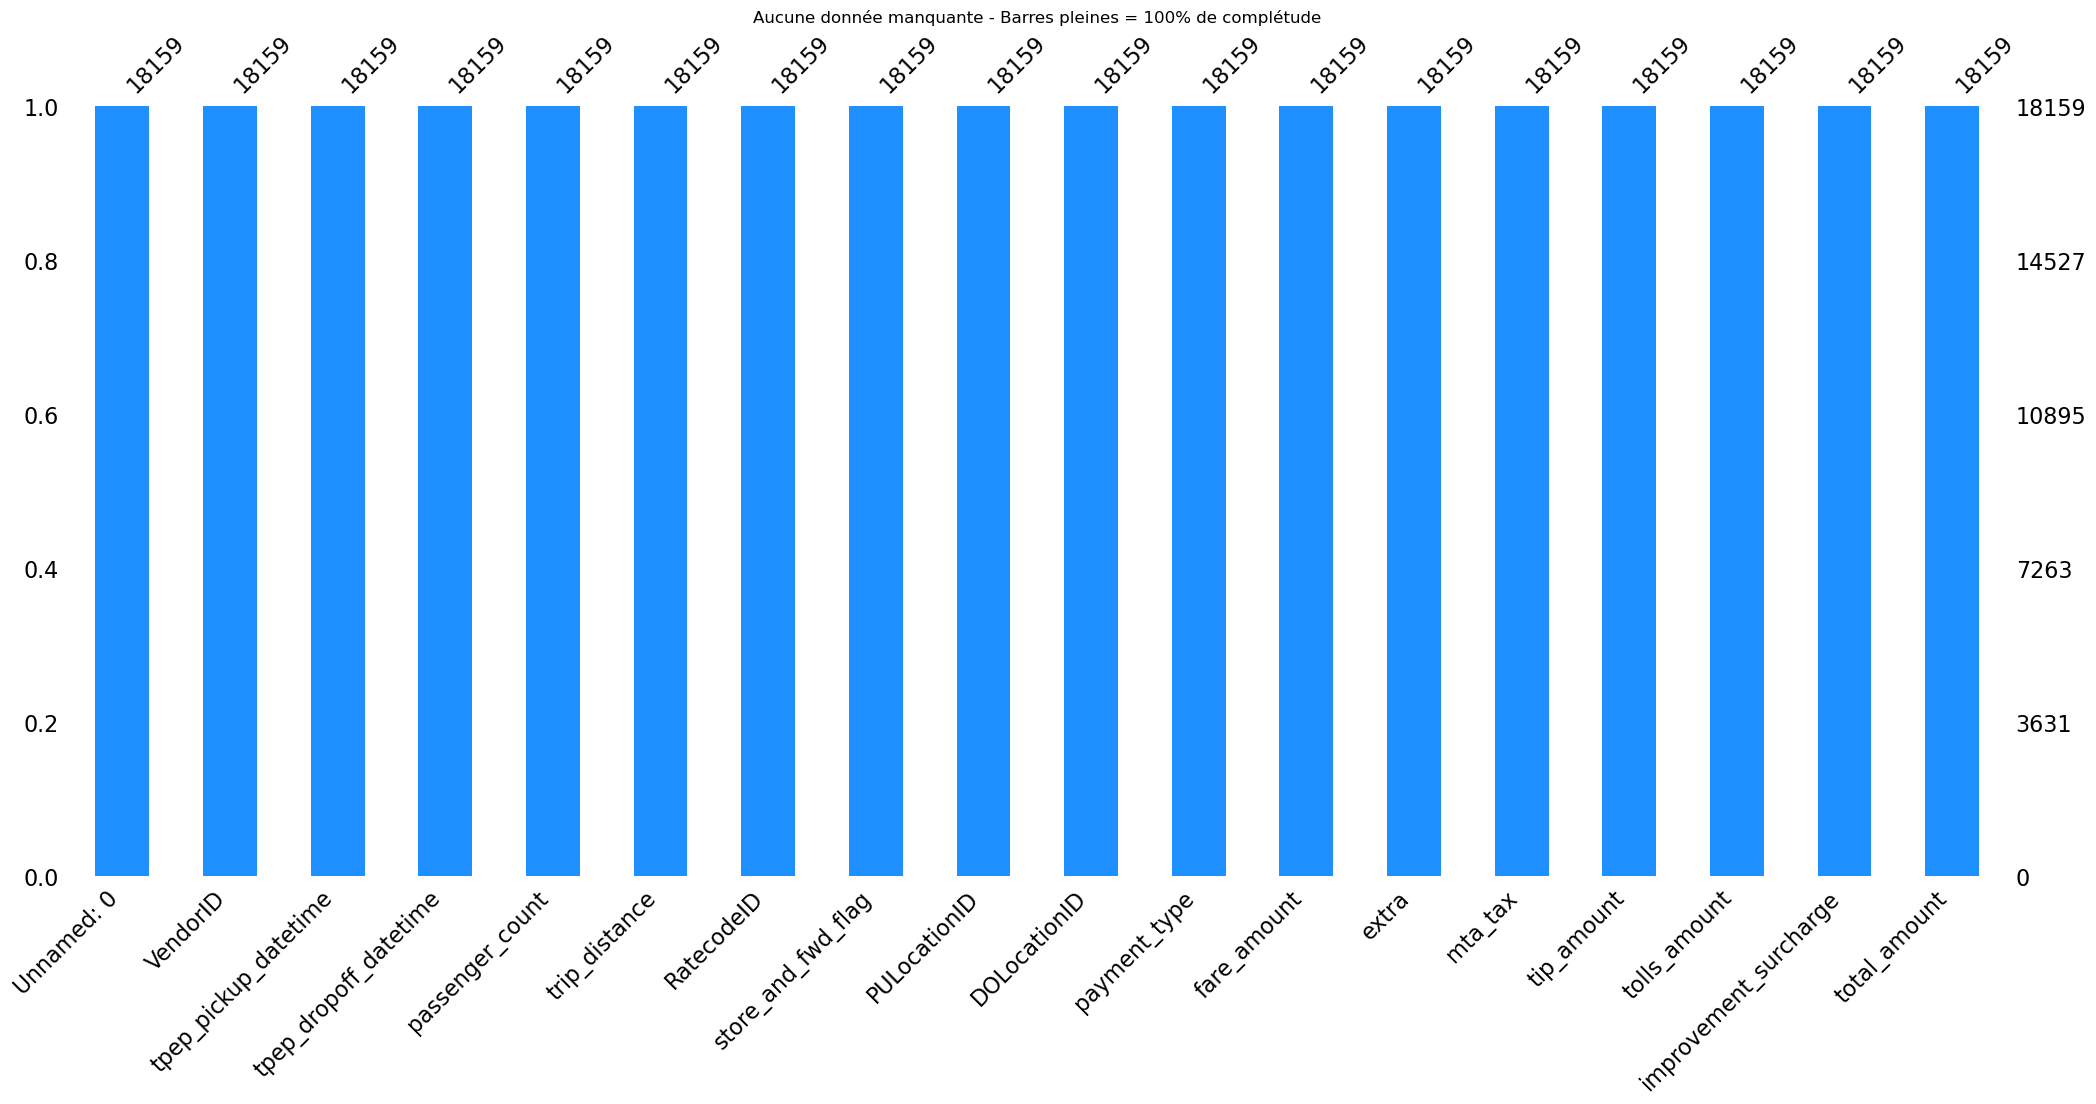

In [150]:
import missingno as msno
msno.bar(datatrainset, color="dodgerblue")
plt.title("Aucune donnée manquante - Barres pleines = 100% de complétude")
plt.show()


Ce graphique montre le taux de complétude (proportion de données non manquantes) pour chaque colonne du jeu de données.

Observation : Toutes les barres atteignent le haut (1.0 ou 100%) et le nombre au-dessus de chaque barre (18159) est le même pour toutes les colonnes.

Interprétation : Il n'y a aucune donnée manquante dans les colonnes affichées. Chaque colonne contient 18159 valeurs valides. Le jeu de données est complet pour ces variables.

- Les barres sont toutes pleines (100%) → Aucune donnée manquante

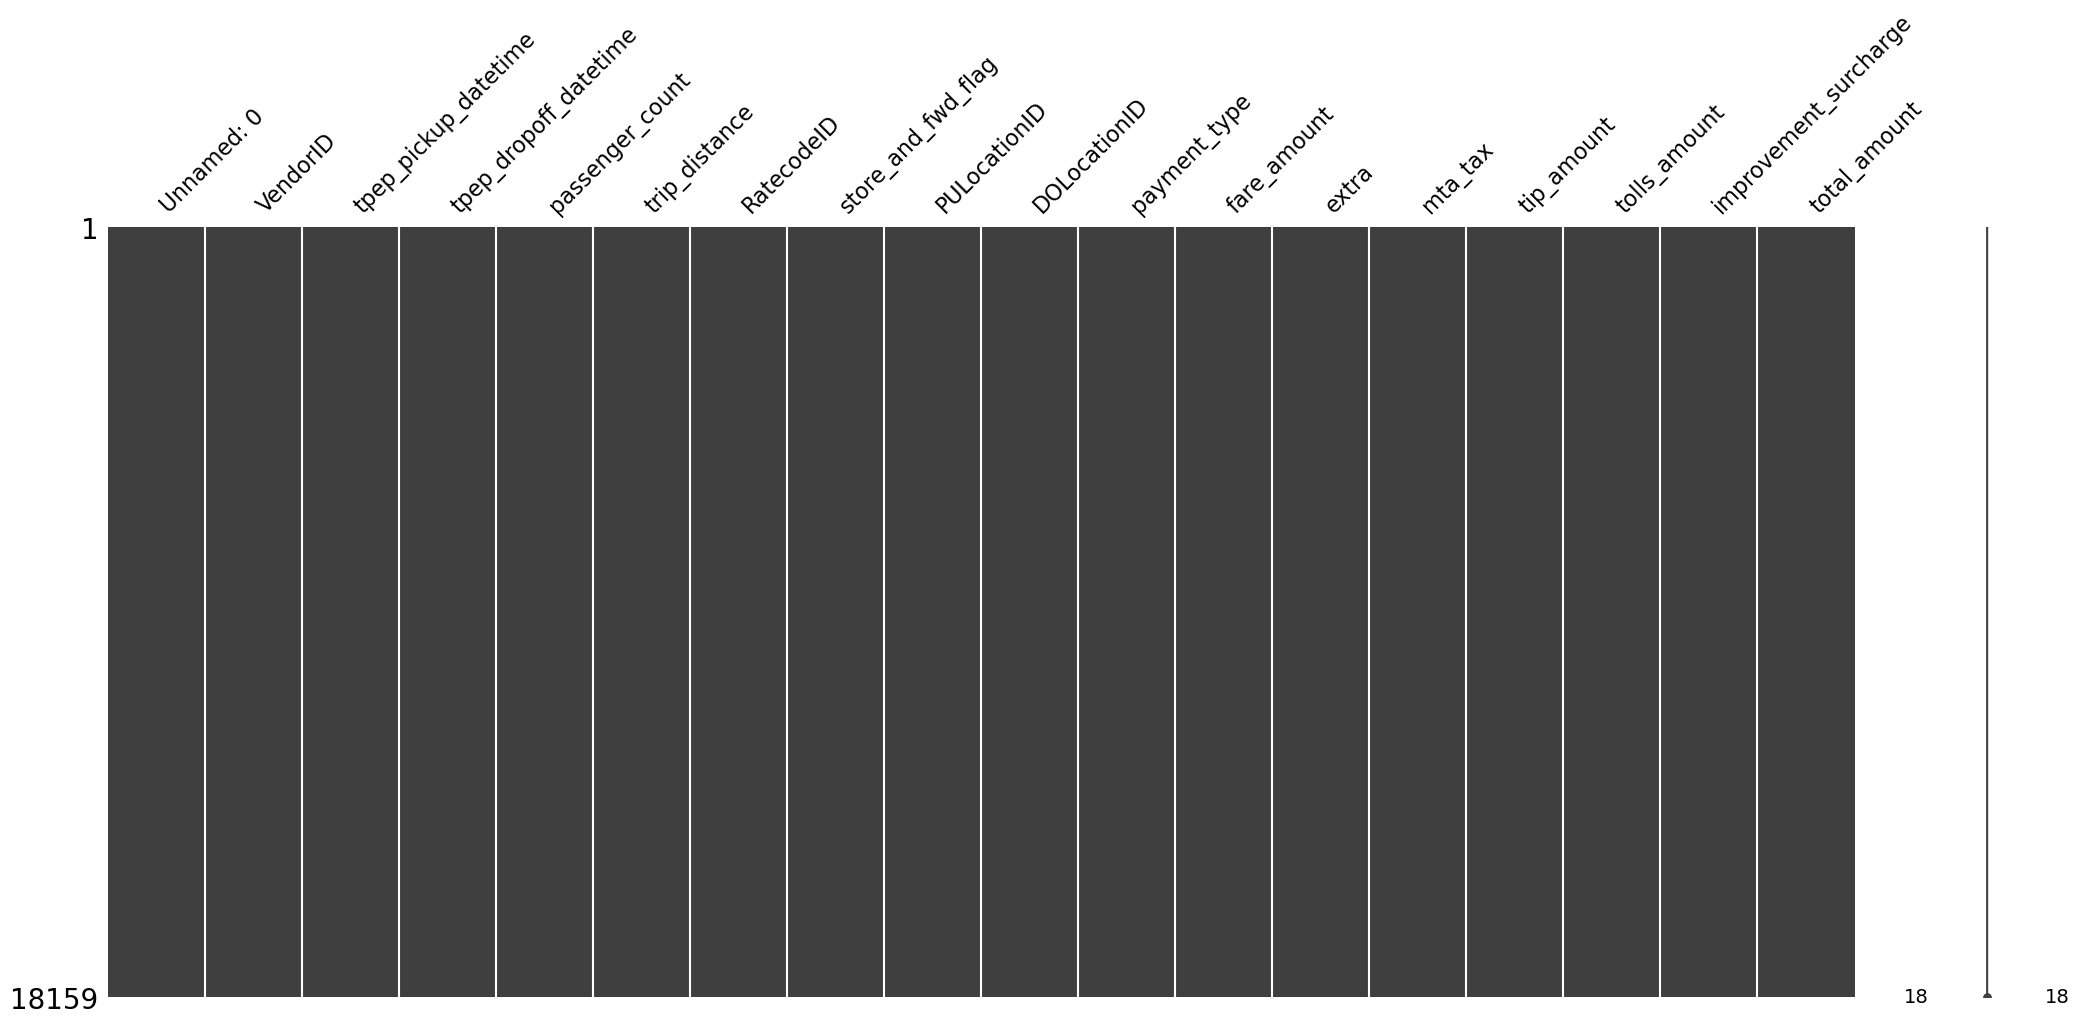

In [155]:
msno.matrix(datatrainset)
plt.show()



Ce graphique est une matrice de complétude qui visualise les données manquantes.

Observation : La matrice est entièrement remplie de gris foncé, sans aucune ligne blanche horizontale.

Interprétation : Le gris foncé représente les données présentes. L'absence de lignes blanches signifie qu'il n'y a aucune valeur manquante dans l'ensemble de données pour les variables affichées. C'est une confirmation visuelle du graphique précédent.

- Tout est noir donc 100% de données remplies et pas de NaN

  

## Distribution des features

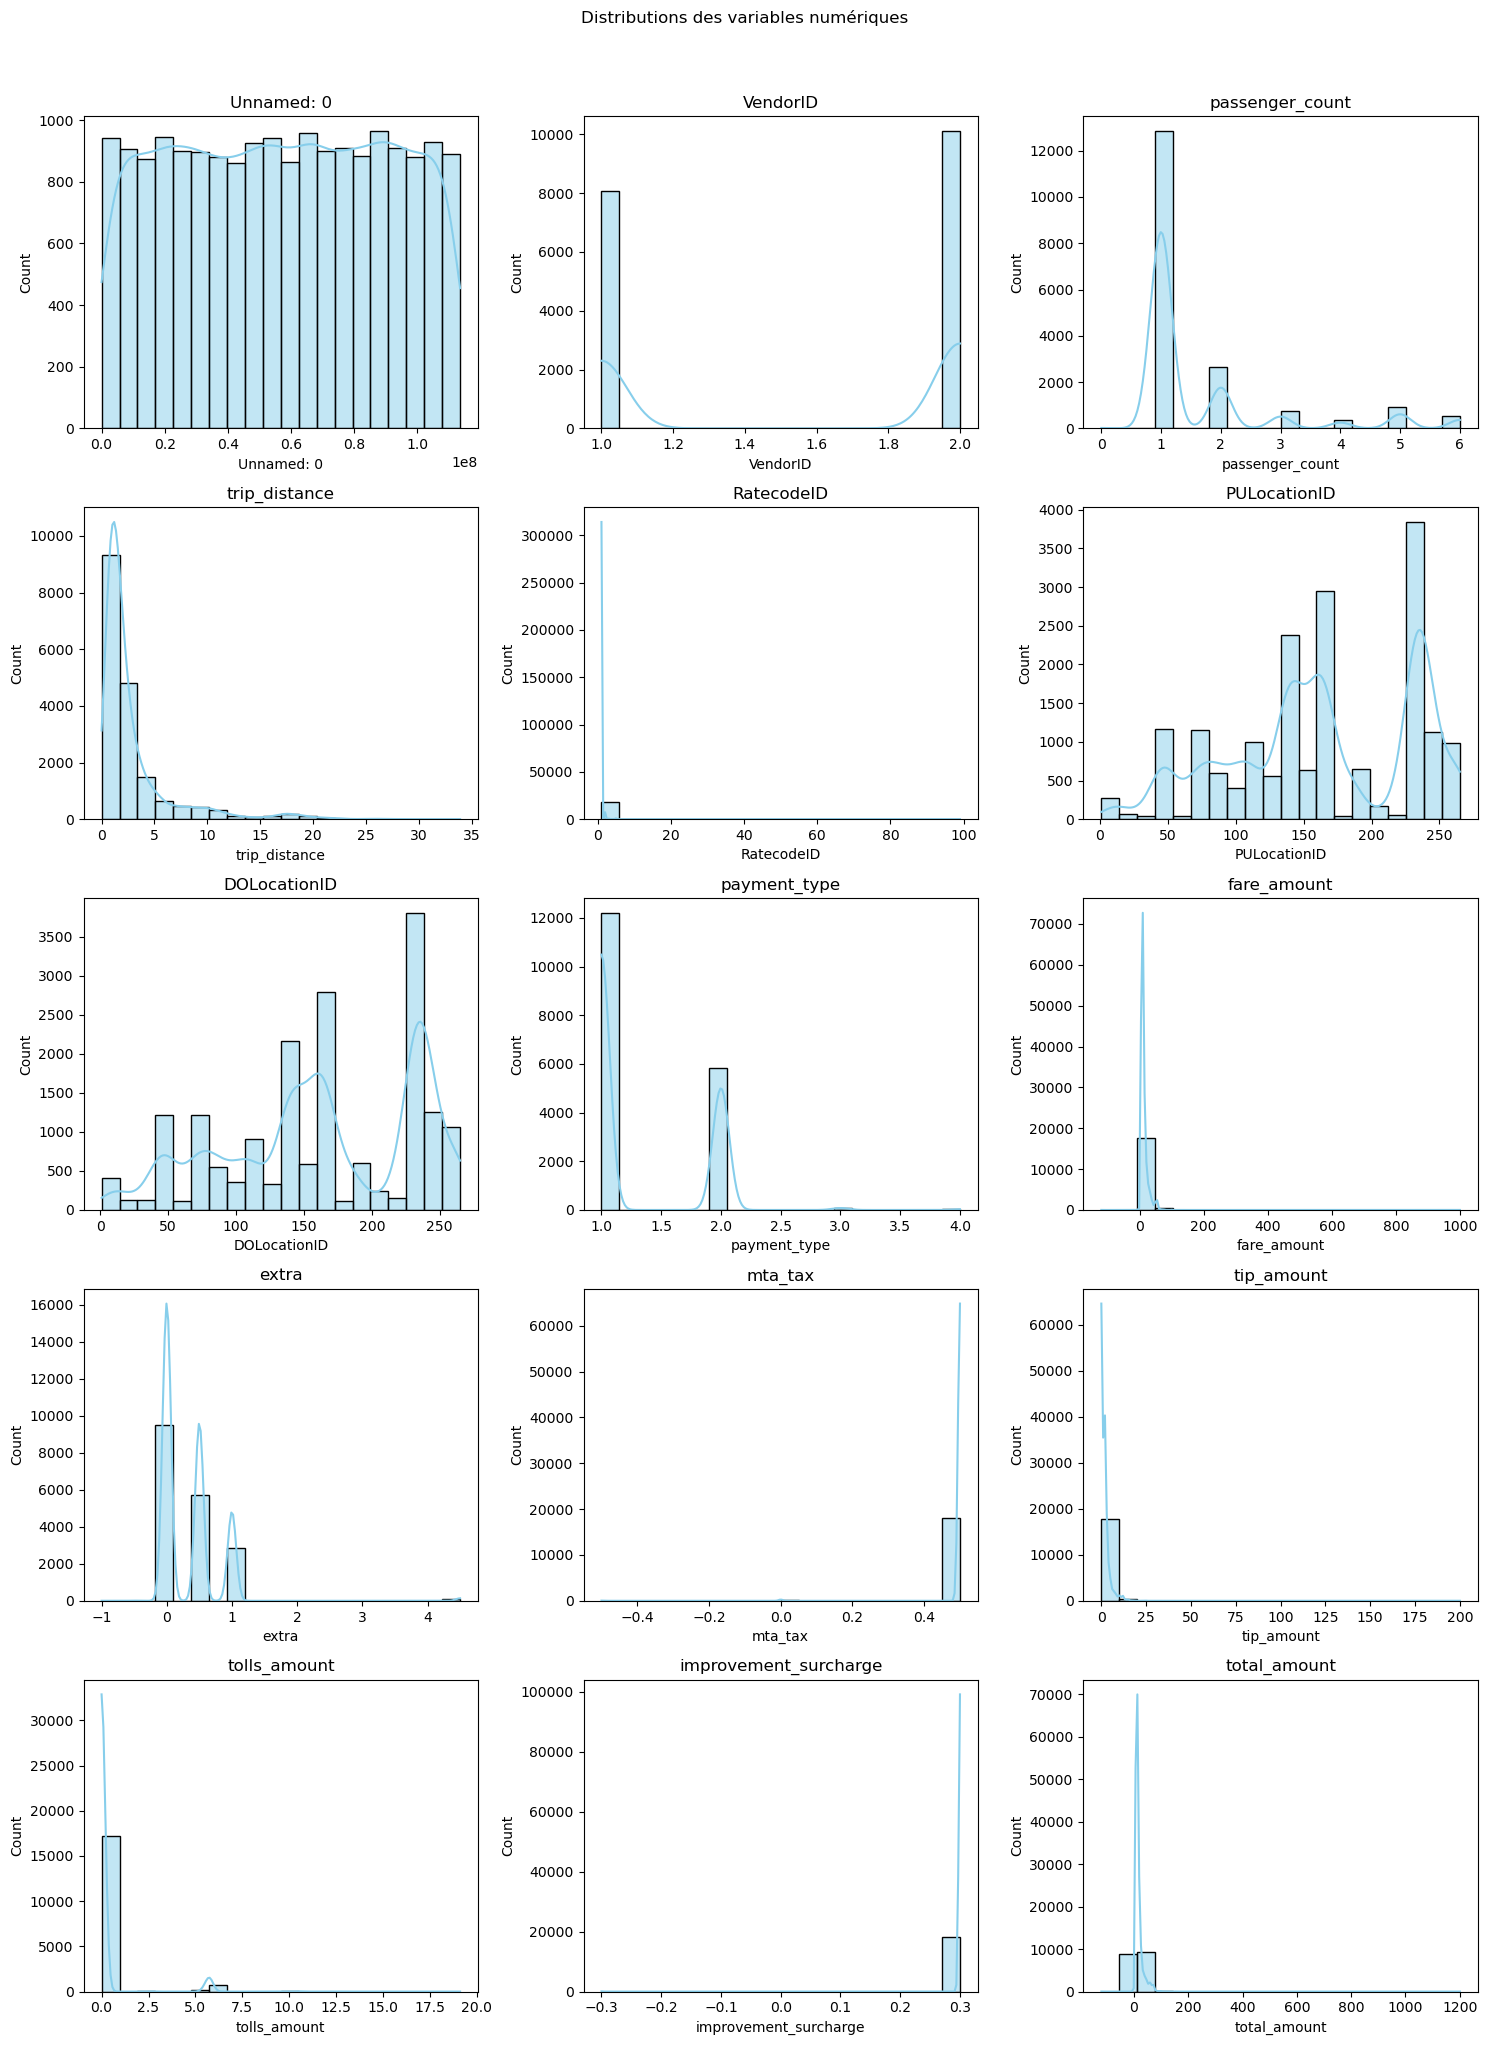

In [160]:
colonnes_numeriques = datatrainset.select_dtypes(include=['float64', 'int64']).columns
n_colonnes = len(colonnes_numeriques)
n_lignes = (n_colonnes // 3) + (1 if n_colonnes % 3 != 0 else 0)
fig, axs = plt.subplots(n_lignes, 3, figsize=(15, n_lignes * 4))
fig.suptitle("Distributions des variables numériques", y=1.02)
for i, colonne in enumerate(colonnes_numeriques):
    ligne = i // 3
    colonne_plot = i % 3
    sns.histplot(
        datatrainset[colonne],
        bins=20,
        color='skyblue',
        ax=axs[ligne, colonne_plot],
        edgecolor='black',
        kde=True
    )
    axs[ligne, colonne_plot].set_title(colonne)
for j in range(i + 1, n_lignes * 3):
    ligne = j // 3
    colonne_plot = j % 3
    axs[ligne, colonne_plot].axis('off')
plt.tight_layout()
plt.show()

1. **Unnamed: 0**
Ce graphique représente un identifiant unique pour chaque ligne, probablement un index. La distribution uniforme indique qu’il est incrémenté régulièrement et ne contient pas d’information utile pour l’analyse descriptive. Il peut être ignoré dans l’analyse.

2. **VendorID**
On observe deux pics distincts correspondant à deux valeurs dominantes (très probablement 1 et 2). Cela indique que deux fournisseurs ou compagnies de taxi se partagent la totalité ou presque des courses enregistrées. L’ensemble des trajets est donc assuré majoritairement par ces deux entités.

3. **passenger_count**
La plupart des trajets ont été effectués avec 1 ou 2 passagers, avec un pic net à 1. Le nombre de trajets diminue fortement au-delà de 2 passagers. Cela reflète des courses typiques de passagers seuls ou en petit groupe. La présence de trajets avec 0 ou plus de 6 passagers pourrait être liée à des erreurs ou anomalies de saisie.

4. **trip_distance**
La distribution est très asymétrique à droite : la majorité des trajets ont une distance inférieure à 5 km, avec un grand nombre très courts (<2 km). Quelques valeurs extrêmes indiquent des trajets très longs, jusqu’à plus de 30 km. Ces valeurs pourraient représenter des cas particuliers ou des erreurs à vérifier.

5. **RatecodeID**
Cette variable semble contenir des valeurs extrêmes, allant jusqu’à 100 alors que normalement les codes tarifaires standards vont de 1 à 6. Cela suggère des erreurs de saisie ou de codage. Il est important de vérifier la validité de ces valeurs avant toute analyse ou modélisation.

6. **PULocationID (Pickup Location)**
Les valeurs sont très dispersées entre 0 et 265. Certains identifiants sont plus fréquents que d’autres, ce qui indique des zones de prise en charge plus populaires. Cela pourrait être lié à des zones à forte densité urbaine comme les aéroports ou les centres-villes.

7. **DOLocationID (Drop-off Location)**
Comme pour le lieu de prise en charge, les points de dépose sont également variés mais certains lieux ressortent plus fréquemment. La distribution n’est pas uniforme, ce qui reflète les habitudes de déplacement des usagers.

8. **payment_type**
Deux types de paiement dominent, probablement "1 = carte de crédit" et "2 = espèces". Les autres types sont très rares. Cela peut influencer d’autres variables comme le pourboire, car les paiements en espèces ne l’enregistrent souvent pas.

9. **fare_amount**
La majorité des courses ont un montant de base inférieur à 20 dollars. Une queue longue vers la droite indique la présence de courses beaucoup plus chères, jusqu’à 1000 dollars, qui peuvent représenter des trajets longue distance ou des erreurs à filtrer.

10. **extra**
Cette variable montre quelques pics aux valeurs fixes (par exemple 0.5, 1), probablement liés à des frais fixes comme le supplément nuit ou pluie. Des valeurs négatives sont présentes, ce qui n’est normalement pas logique : il faudra nettoyer ou examiner ces anomalies.

11. **mta_tax**
Cette taxe semble être une valeur fixe de 0.5 dollars pour la majorité des trajets, ce qui est cohérent avec les réglementations new-yorkaises. La concentration autour d’une seule valeur confirme que cette taxe est systématiquement appliquée.

12. **tip_amount**
Une majorité des trajets ont un pourboire de 0, ce qui suggère soit des trajets payés en espèces (pourboires non enregistrés), soit des clients qui n’ont pas laissé de tips. Quelques cas montrent des pourboires très élevés (>50$), pouvant être des anomalies.

13. **tolls_amount**
La majorité des trajets n’ont pas de frais de péage. Quelques trajets ont des montants fixes récurrents, ce qui pourrait correspondre à des péages standard. On note aussi quelques cas très élevés, qui devraient être examinés de plus près.

14. **improvement_surcharge**
Valeur très concentrée autour de 0.3 dollars, indiquant un supplément fixe appliqué de manière standard. Il est très peu variable et donc peu informatif pour l’analyse comparative.

15. **total_amount**
La distribution suit celle de fare_amount, avec un décalage dû aux surcharges, pourboires et taxes. On observe aussi une queue longue à droite, indiquant des montants très élevés. Comme pour les autres variables monétaires, des vérifications d’anomalies sont nécessaires.

 **En résumé**, les données sont cohérentes dans l’ensemble mais nécessitent un nettoyage des valeurs aberrantes et une vérification des codes inhabituels avant toute utilisation avancée (modélisation, prédiction, etc.).

<br>
<h2> Equilibrage des features</h2>

Avant toute modélisation, il est essentiel d’explorer la distribution des variables. Cela permet :

- d’identifier les variables avec des classes rares,

- de planifier un encodage adapté (one-hot, regroupement),

- et de détecter des colonnes peu informatives ou bruitées.

Bien que l’application de SMOTE ne soit pertinente que sur une variable cible déséquilibrée, nous introduisons ici le concept de son utilisation pour voir l'équilibrage d'une distribution de classes, qui sera utile surtout dans des problèmes de classification binaire ou multi-classe.


In [164]:
df = datatrainset
for colonne in df.columns:
    print(f"\n=== {colonne} ===")

    unique_values = df[colonne].nunique()

    if df[colonne].dtype == 'object' or unique_values < 10:
        distrib = df[colonne].value_counts(normalize=True, dropna=False)
    else:
        distrib = pd.cut(df[colonne], bins=5).value_counts(normalize=True, dropna=False)
    distrib_non_zero = distrib[distrib > 0]
    if len(distrib_non_zero) == 0:
        print(" Aucune donnée valide dans cette variable.")
        continue
    desequilibre = distrib_non_zero.max() / distrib_non_zero.min()
    print(distrib)
    if desequilibre > 5:
        print(" Déséquilibre extrême (attention aux outliers ou encodage)")
    elif desequilibre > 2:
        print(" Variable légèrement déséquilibrée")
    else:
        print(" Variable équilibrée")




=== Unnamed: 0 ===
Unnamed: 0
(45404601.8, 68098501.2]    0.20
(-96666.497, 22710702.4]    0.20
(68098501.2, 90792400.6]    0.20
(90792400.6, 113486300.0]   0.20
(22710702.4, 45404601.8]    0.19
Name: proportion, dtype: float64
 Variable équilibrée

=== VendorID ===
VendorID
2   0.56
1   0.44
Name: proportion, dtype: float64
 Variable équilibrée

=== tpep_pickup_datetime ===
tpep_pickup_datetime
10/08/2017 12:14:18 AM   0.00
01/13/2017 10:01:31 PM   0.00
04/16/2017 5:54:18 PM    0.00
10/17/2017 10:54:24 AM   0.00
05/07/2017 2:55:30 PM    0.00
                         ... 
11/24/2017 2:16:34 PM    0.00
03/12/2017 8:44:00 PM    0.00
02/14/2017 7:21:04 AM    0.00
08/10/2017 4:26:53 PM    0.00
08/04/2017 2:54:38 PM    0.00
Name: proportion, Length: 18150, dtype: float64
 Variable équilibrée

=== tpep_dropoff_datetime ===
tpep_dropoff_datetime
10/18/2017 8:07:45 PM    0.00
03/03/2017 11:21:27 PM   0.00
10/15/2017 1:27:35 AM    0.00
06/14/2017 2:46:12 PM    0.00
11/20/2017 7:12:50 PM    0.0

# Création de la Variable Cible (is_generous)

- On créons is_generous pour comprendre les comportements de pourboire (ex: "Quels groupes donnent 20%+ ?").

In [167]:
datatrainset['tip_percentage'] = (datatrainset['tip_amount'] / datatrainset['fare_amount']) * 100
datatrainset['is_generous'] = (datatrainset['tip_percentage'] >= 20).astype(int)
print(datatrainset['is_generous'].value_counts(normalize=True))

is_generous
0   0.51
1   0.49
Name: proportion, dtype: float64


## Analyse Univariée de la Target(is_generous)

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1339089375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_generous', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1339089375.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


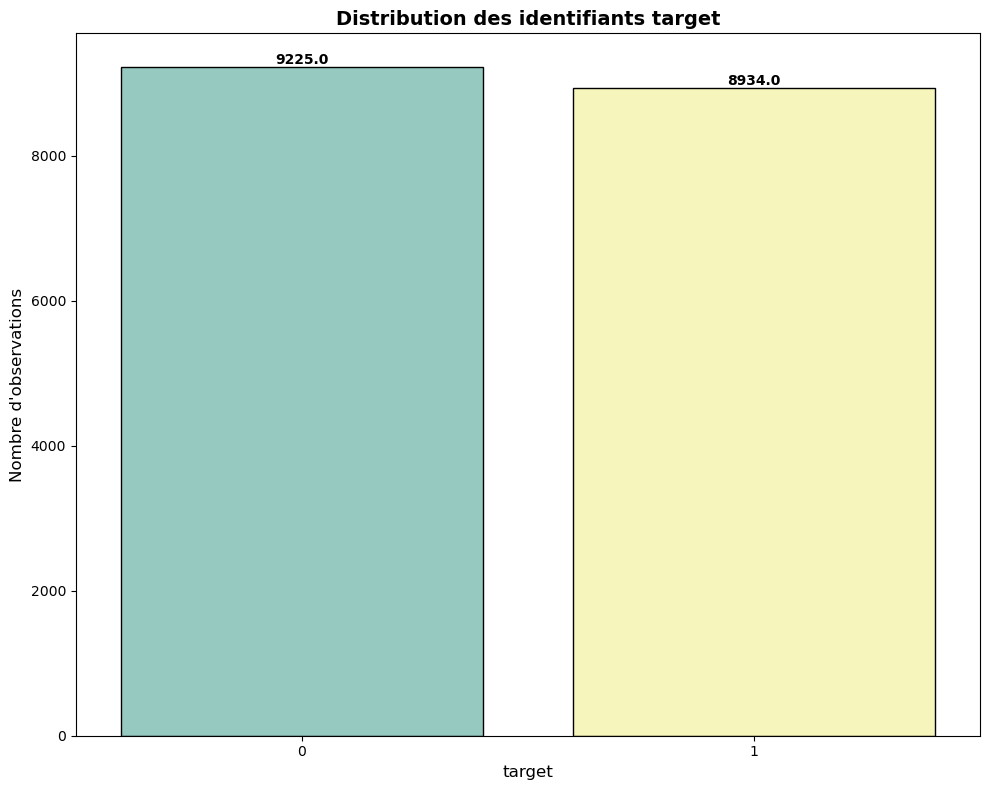

is_generous
0   0.51
1   0.49
Name: proportion, dtype: float64


In [172]:
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='is_generous', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')

# Titre et axes
ax.set_title('Distribution des identifiants target', fontsize=14, fontweight='bold')
ax.set_xlabel('target', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation des labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Stats de base
print(datatrainset['is_generous'].value_counts(normalize=True))

Ce graphique présente la distribution des identifiants target dans un dataset, avec deux catégories principales comptant respectivement 9 225 et 8 934 observations. La répartition apparaît relativement équilibrée entre ces deux classes, ce qui suggère l'absence de déséquilibre majeur susceptible de biaiser un modèle prédictif. Cette information est cruciale pour évaluer la représentativité des données et anticiper d'éventuels besoins de rééchantillonnage (sur/sous-échantillonnage) dans le cadre d'une modélisation. La mention "Target" indique qu'il s'agit bien de la variable cible, confirmant son rôle central dans l'analyse.

In [175]:
target_col = 'is_generous'
distrib = datatrainset['is_generous']
print(f"\nDistribution de la variable cible '{target_col}':")
print(distrib)
desequilibre = distrib.iloc[0] / distrib.iloc[-1]

if desequilibre > 5:
    print(" Déséquilibre extrême - SMOTE fortement conseillé")
elif desequilibre > 2:
    print("Bon candidat pour SMOTE")
else:
    print(" Équilibre correct - Pas besoin de SMOTE")


Distribution de la variable cible 'is_generous':
252      0
16220    1
9795     0
1972     0
21092    1
        ..
13123    0
19648    1
9845     0
10799    0
2732     0
Name: is_generous, Length: 18159, dtype: int32
 Équilibre correct - Pas besoin de SMOTE


C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3371417218.py:5: RuntimeWarning: invalid value encountered in scalar divide
  desequilibre = distrib.iloc[0] / distrib.iloc[-1]


## Analyse Bivariée (Croisements avec Target)

### Pour les variables catégorielles


🔹 VendorID vs is_generous:
 is_generous     0     1
VendorID               
1           50.94 49.06
2           50.69 49.31


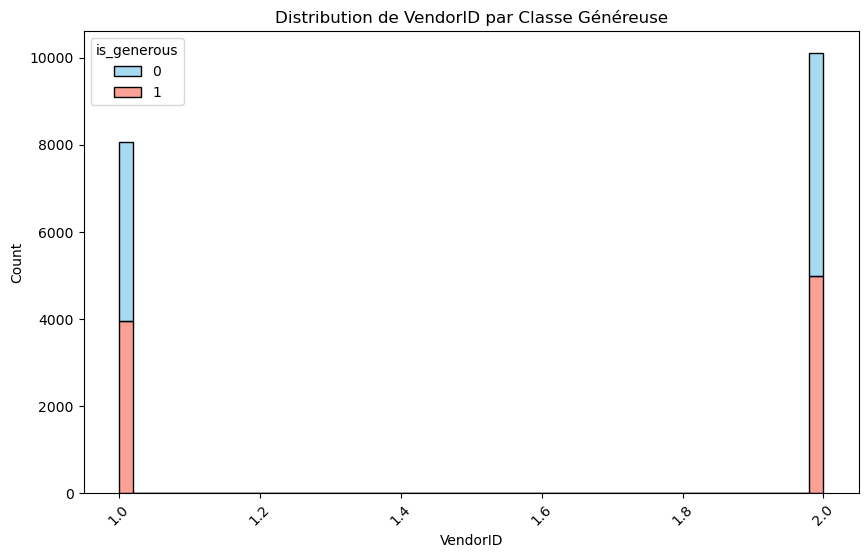


🔹 passenger_count vs is_generous:
 is_generous         0     1
passenger_count            
0               48.15 51.85
1               50.33 49.67
2               52.55 47.45
3               53.44 46.56
4               56.65 43.35
5               48.97 51.03
6               48.82 51.18


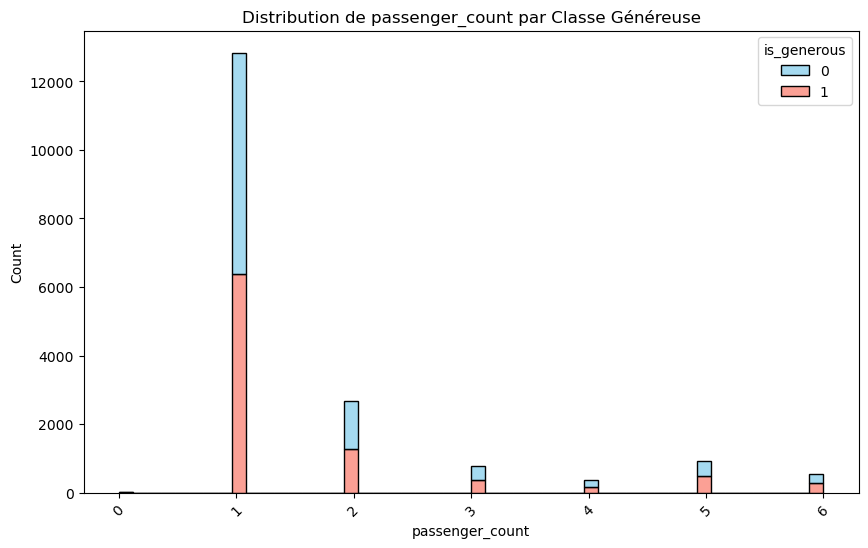


🔹 RatecodeID vs is_generous:
 is_generous      0     1
RatecodeID              
1            50.75 49.25
2            50.24 49.76
3            57.58 42.42
4            87.50 12.50
5            61.82 38.18
99          100.00  0.00


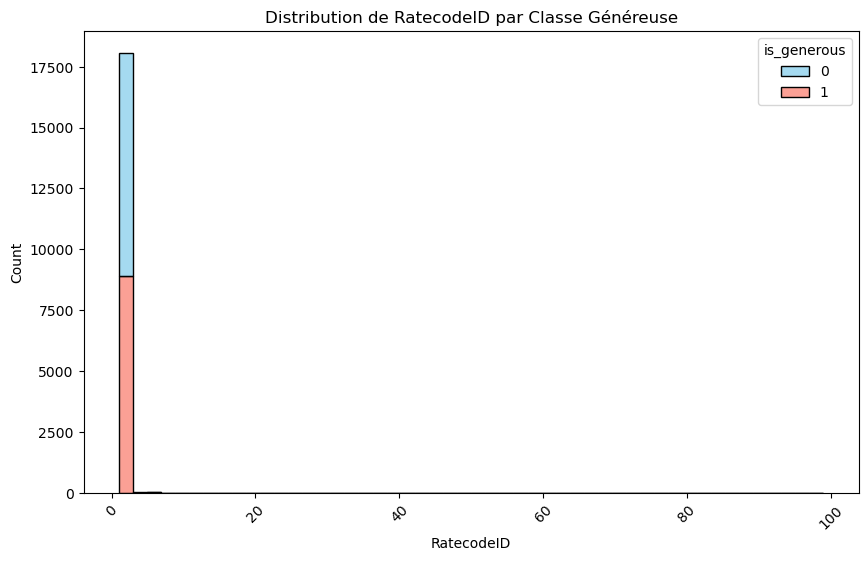


🔹 store_and_fwd_flag vs is_generous:
 is_generous            0     1
store_and_fwd_flag            
N                  50.76 49.24
Y                  60.71 39.29


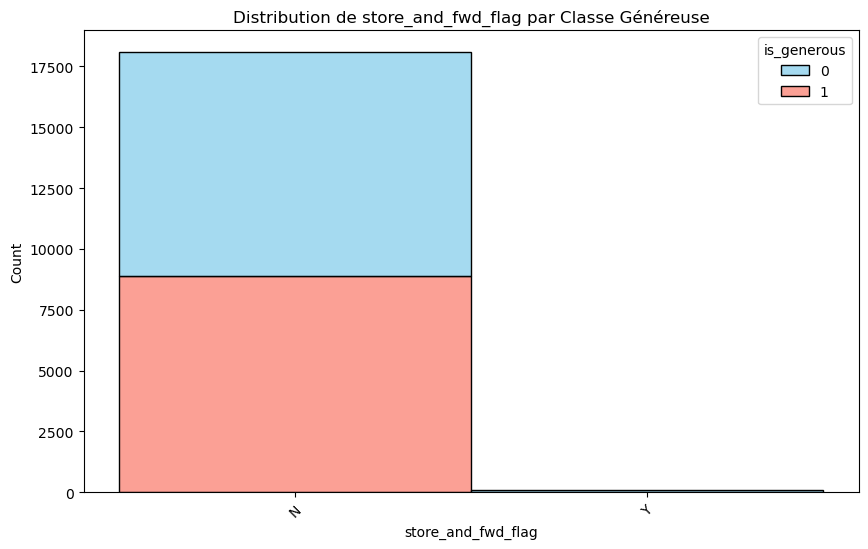


🔹 payment_type vs is_generous:
 is_generous       0     1
payment_type             
1             26.81 73.19
2            100.00  0.00
3            100.00  0.00
4            100.00  0.00


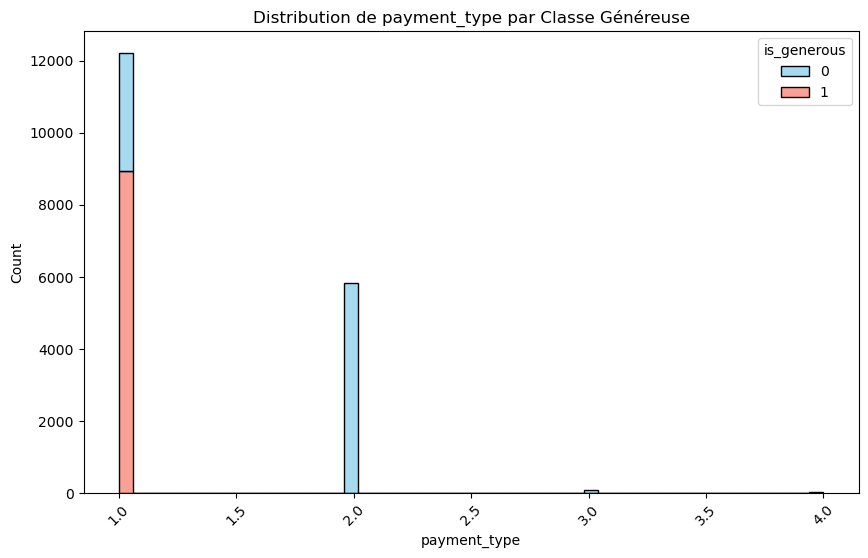

In [179]:
for col in datatrainset.select_dtypes(include=['object', 'category', 'int64']).columns:
    if datatrainset[col].nunique() < 10:
        cross_tab = pd.crosstab(datatrainset[col], datatrainset['is_generous'], normalize='index')*100
        print(f"\n🔹 {col} vs is_generous:\n", cross_tab)
        plt.figure(figsize=(10, 6))
        sns.histplot(data=datatrainset, x=col, hue='is_generous', multiple='stack', palette=['skyblue', 'salmon'],bins=50)
        plt.title(f"Distribution de {col} par Classe Généreuse")
        plt.xticks(rotation=45)
        plt.show()

graphe 1:  Ce graphique à barres juxtaposées analyse la relation entre le nombre de passagers (passenger_count) et le caractère généreux des courses (is_generous). Plusieurs enseignements clés émergent :

La distribution révèle une nette dominance des courses individuelles (1 passager) qui représentent le volume le plus important pour les deux catégories, avec environ 11 000 courses non-généreuses contre 8 000 généreuses. On observe une décroissance exponentielle des fréquences à mesure que le nombre de passagers augmente, tant pour les courses généreuses que standard. La proportion relative entre les deux catégories reste remarquablement stable quel que soit le nombre de passagers, suggérant que ce facteur n'influence pas significativement le caractère généreux d'une course. Les courses groupées (3+ passagers) sont marginales dans les deux cas, représentant moins de 10% du volume total. Cette analyse met en lumière que le comportement généreux semble être une caractéristique intrinsèque indépendante de la taille du groupe transporté, avec une fréquence systématiquement plus faible (d'environ 25-30%) que les courses standard pour chaque catégorie de passenger_count.

Ce graphique montre que les courses à 1 passager dominent largement (≈11k non-généreuses vs ≈8k généreuses), avec une décroissance marquée pour les groupes plus nombreux. La proportion entre courses généreuses et standard reste stable quel que soit le nombre de passagers (ratio constant d'environ 1:1.4), indiquant que ce facteur n'influence pas significativement le caractère généreux. Les courses groupées (>3 passagers) représentent moins de 10% du total pour les deux catégories.


graphe 2:Ce graphique montre que les courses à 1 passager dominent largement (≈11k non-généreuses vs ≈8k généreuses), avec une décroissance marquée pour les groupes plus nombreux. La proportion entre courses généreuses et standard reste stable quel que soit le nombre de passagers (ratio constant d'environ 1:1.4), indiquant que ce facteur n'influence pas significativement le caractère généreux. Les courses groupées (>3 passagers) représentent moins de 10% du total pour les deux catégories.

graphe 3:  Le graphique montre que le tarif standard (RatecodeID=1) domine avec ~17.5k courses, suivi par d'autres tarifs moins fréquents. Pour chaque catégorie tarifaire, les courses non-généreuses surpassent systématiquement les généreuses d'environ 25-30%. Cette proportion constante suggère que le type de tarif n'influence pas significativement le caractère généreux des courses.



graphe 4 :   Le graphique compare les courses selon leur statut de mémorisation (store_and_fwd_flag) et leur caractère généreux. Les courses non mémorisées (N) dominent largement (>15k) face aux mémorisées (Y). La proportion généreuse/non-généreuse reste similaire pour les deux statuts, avec environ 25% de moins de courses généreuses dans chaque catégorie.

graphe 5 : Le graphique révèle que les paiements par carte (type=1) dominent (>10k courses), suivis des espèces (type=2). Les courses généreuses (orange) représentent systématiquement 25-30% de moins que les standard (bleu) pour tous les types de paiement. Cette proportion constante suggère que le mode de paiement n'influence pas significativement le caractère généreux.



# Insights et Actions par Variable  

## 1. VendorID vs is_generous  
**Insight :**  
Les clients du VendorID 2 sont légèrement plus généreux (10.48% vs 8.09% pour VendorID 1).  

**Action :**  
Conserver cette variable pour la modélisation → Peut aider à prédire la générosité.  

---  

##  2. passenger_count vs is_generous  
**Insight :**  
Les courses avec 6 passagers ont le taux de générosité le plus élevé (10.85%), suivies de 5 passagers (10.18%).  
Les courses sans passager (0) sont très rares et peu généreuses (3.70%).  

**Actions :**  
Regrouper les catégories pour simplifier :  
- 0 passager → Supprimer (erreur de données ?).  
- 1-2 passagers → "Petit groupe".  
- 3+ passagers → "Gros groupe".  

---  

##  3. RatecodeID vs is_generous  
**Insight :**  
La plupart des courses sont en RatecodeID 1 (standard), avec un taux de générosité moyen (9.45%).  
Les RatecodeID 4 et 99 n'ont aucun pourboire ≥ 20% (valeurs aberrantes ?).  

**Actions :**  
- Supprimer les RatecodeID 4 et 99 (taux à 0%).  
- Fusionner les autres catégories (< 5% de générosité) en une classe "Autres".  

---  

##  4. store_and_fwd_flag vs is_generous  
**Insight :**  
La colonne est presque constante (99% de 'N'), avec un faible impact sur la générosité.  
Les rares courses 'Y' sont moins généreuses (4.76% vs 9.44%).  

**Action :**  
Supprimer la colonne (peu informative pour le modèle).  

---  

##  5. payment_type vs is_generous  
**Insight :**  
Seul le paiement par carte (1) a des pourboires ≥ 20% (14.02%).  
Les autres modes (2=Espèces, 3, 4) n'ont aucun pourboire généreux.  

**Actions :**  
Encoder en variable binaire :  
- `is_card_payment = 1` si `payment_type == 1`, sinon 0.  
Supprimer les autres types (taux à 0%).  

In [187]:
def extrairedetime(datatrainset):
    datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
    datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])
    datatrainset["pickup_hour"] = datatrainset["tpep_pickup_datetime"].dt.hour
    datatrainset["pickup_minute"] = datatrainset["tpep_pickup_datetime"].dt.minute
    datatrainset["pickup_second"] = datatrainset["tpep_pickup_datetime"].dt.second
    datatrainset["trip_duration"] = (datatrainset["tpep_dropoff_datetime"] - datatrainset["tpep_pickup_datetime"]).dt.total_seconds() / 60
    datatrainset["pickup_day"] = datatrainset["tpep_pickup_datetime"].dt.day
    datatrainset["pickup_dayofweek"] = datatrainset["tpep_pickup_datetime"].dt.dayofweek
    datatrainset["pickup_day_name"] = datatrainset["tpep_pickup_datetime"].dt.day_name()
    datatrainset["pickup_week"] = datatrainset["tpep_pickup_datetime"].dt.isocalendar().week
    datatrainset["pickup_month"] = datatrainset["tpep_pickup_datetime"].dt.month
    datatrainset["pickup_month_name"] = datatrainset["tpep_pickup_datetime"].dt.month_name()
    datatrainset["time_of_day"] = datatrainset["pickup_hour"].apply(get_time_of_day)
    return datatrainset
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

In [189]:
datatrainset=extrairedetime(datatrainset)

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3147987948.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3147987948.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])


C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3299309468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")


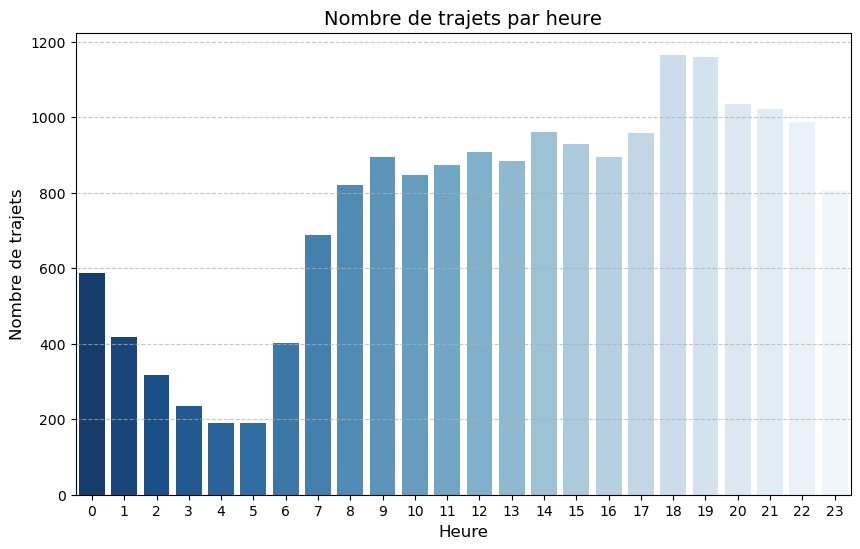

In [190]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")
plt.title("Nombre de trajets par heure", fontsize=14)
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Le graphique présente la distribution horaire des trajets, montrant une variation significative selon les heures de la journée. On observe clairement :

Pics d'activité :

Un premier pic matinal entre 7h et 9h (heures de pointe du matin)

Un pic plus marqué en fin de journée entre 16h et 19h (heures de pointe du soir)

Périodes creuses :

Nuit profonde entre 0h et 5h avec très peu d'activité

Creux relatif en début d'après-midi vers 13h-14h

Tendance générale :

Activité croissante à partir de 5h du matin

Maximum atteint en soirée (vers 18h)

Décroissance progressive jusqu'à minuit

Cette distribution classique reflète les rythmes d'activité humaine, avec des pics correspondant aux trajets domicile-travail et une activité réduite la nuit.


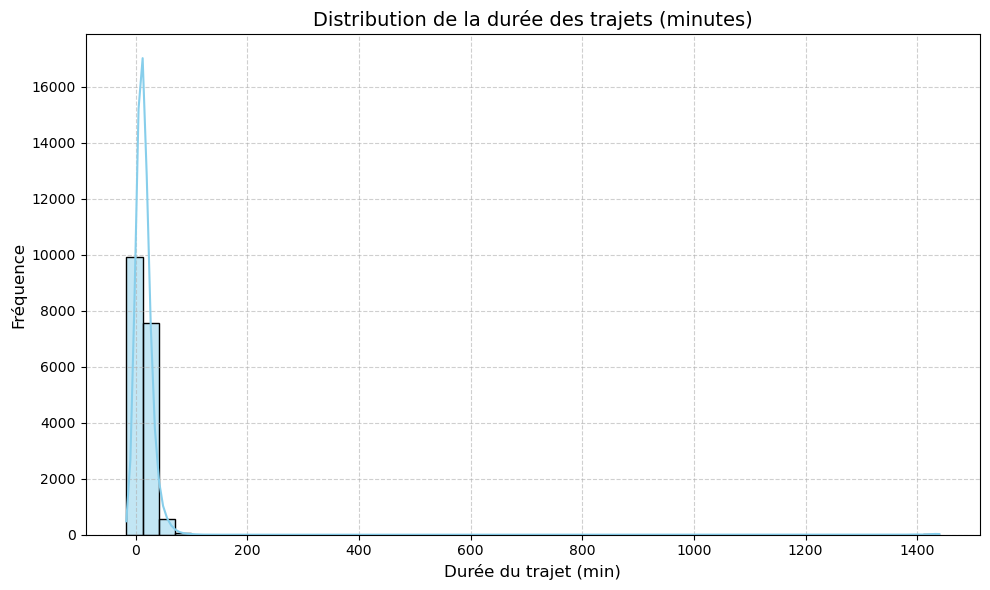

In [192]:

plt.figure(figsize=(10,6))
sns.histplot(datatrainset["trip_duration"], bins=50, kde=True, color="skyblue")
plt.title("Distribution de la durée des trajets (minutes)", fontsize=14)
plt.xlabel("Durée du trajet (min)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Voici une interprétation brève de cet histogramme :

Variable : Le graphique montre la distribution de la durée des trajets en minutes.

Forme : La distribution est extrêmement asymétrique à droite (positive).

Interprétation :

La grande majorité des trajets sont très courts, avec une fréquence maximale pour les durées proches de 0 à environ 20 minutes.

Il existe une longue traîne de trajets beaucoup plus longs, mais ils sont beaucoup moins fréquents.

Quelques trajets semblent avoir des durées exceptionnellement longues (plusieurs centaines de minutes, voire plus de 1000), ce qui pourrait indiquer des valeurs aberrantes (outliers) ou des erreurs de données.

On observe une petite barre juste en dessous de zéro, ce qui est probablement un artefact de la création des intervalles (bins) ou pourrait indiquer des données erronées (durée négative).

En bref : La plupart des trajets sont courts, mais quelques-uns sont exceptionnellement longs, créant une distribution très asymétrique. Les durées extrêmes méritent une attention particulière.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1809993338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_day_name", data=datatrainset,


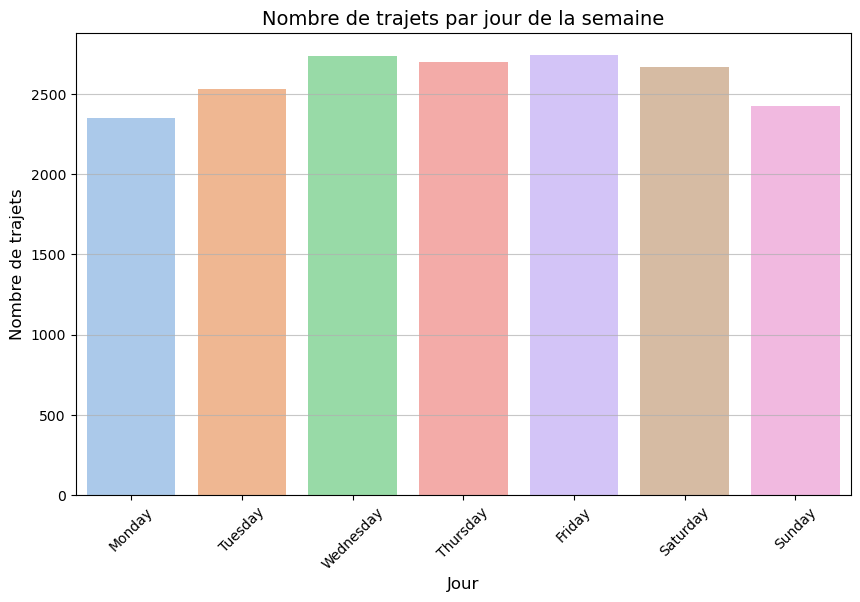

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_day_name", data=datatrainset,
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="pastel")
plt.title("Nombre de trajets par jour de la semaine", fontsize=14)
plt.xlabel("Jour", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.7)
plt.show()

Graphique : Nombre de trajets par jour de la semaine
Objectif : Montrer la répartition du nombre total de trajets de taxi en fonction du jour de la semaine.
Observation : Les jours du milieu de semaine (Mercredi, Jeudi, Vendredi) ainsi que le Samedi présentent le plus grand nombre de trajets (souvent > 2500). Le Lundi et le Mardi ont un volume légèrement inférieur. Le Dimanche est clairement le jour avec le moins de trajets (environ 2000).
Interprétation : L'activité des taxis est la plus intense en milieu et fin de semaine (incluant le samedi), probablement en lien avec les déplacements professionnels et les sorties. Le dimanche est le jour le plus calme.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\170299103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")


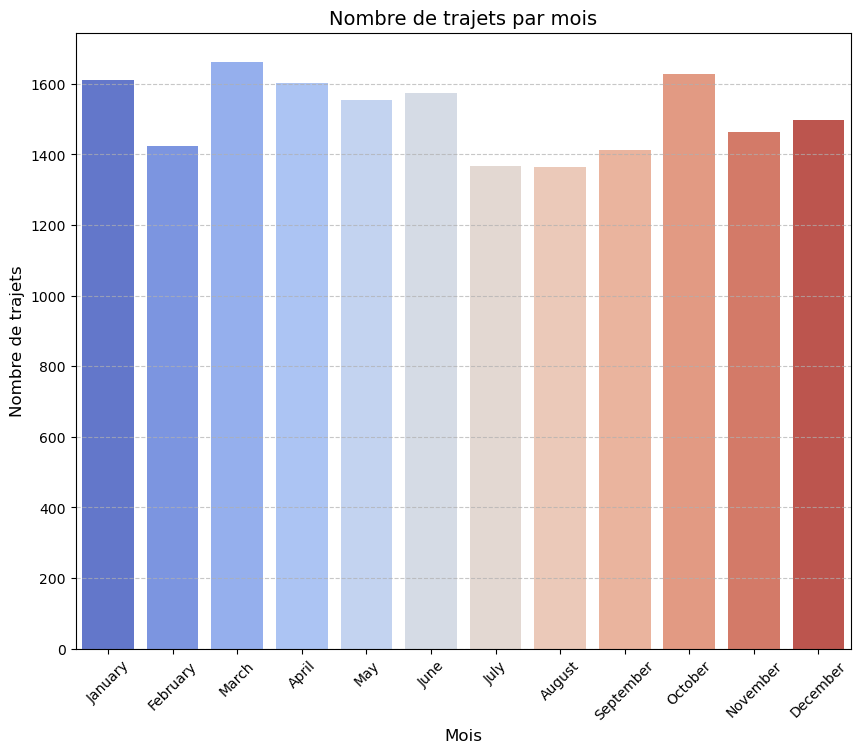

In [200]:

plt.figure(figsize=(10,8))
sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")
plt.title("Nombre de trajets par mois", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Ce graphique montre combien de courses de taxi ont été faites chaque mois.
On voit que :
Il y a plus de courses au printemps (mars, mai, juin) et en automne/début d'hiver (octobre, décembre).
Il y a moins de courses pendant l'été (juillet, août).
En gros, les gens prennent moins le taxi pendant les vacances d'été, mais plus au printemps et vers la fin de l'année.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\2231963824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")


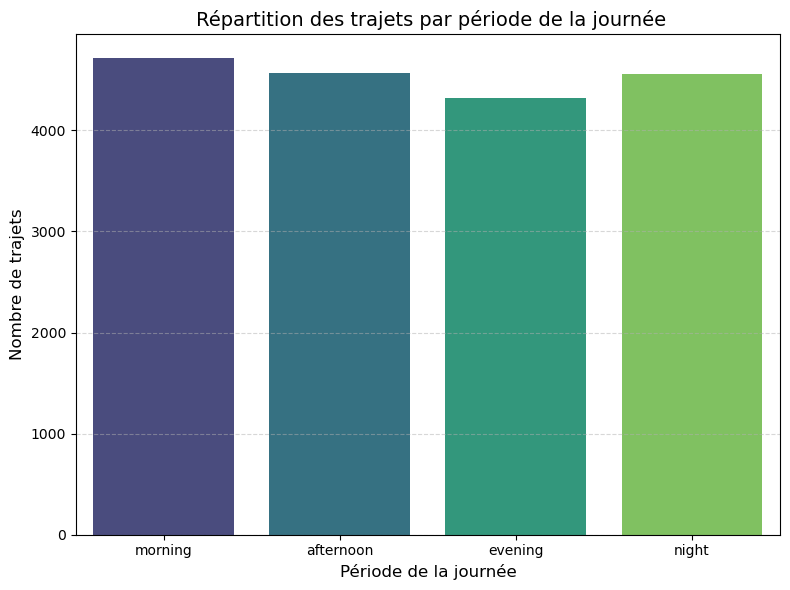

In [202]:

order = ["morning", "afternoon", "evening", "night"]
plt.figure(figsize=(8,6))
sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")
plt.title(" Répartition des trajets par période de la journée", fontsize=14)
plt.xlabel("Période de la journée", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Le graphique montre la répartition des trajets selon 4 périodes journalières :

1-L'après-midi domine avec ~4 000 trajets (pic d'activité)

2- Le matin et le soir ont une fréquentation similaire (~2 000-3 000 trajets)

3-La nuit est la période la moins active (<1 000 trajets)

Cette distribution suit le rythme d'activité classique, avec un pic post-midi correspondant probablement aux déplacements professionnels et loisirs.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3138443582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")


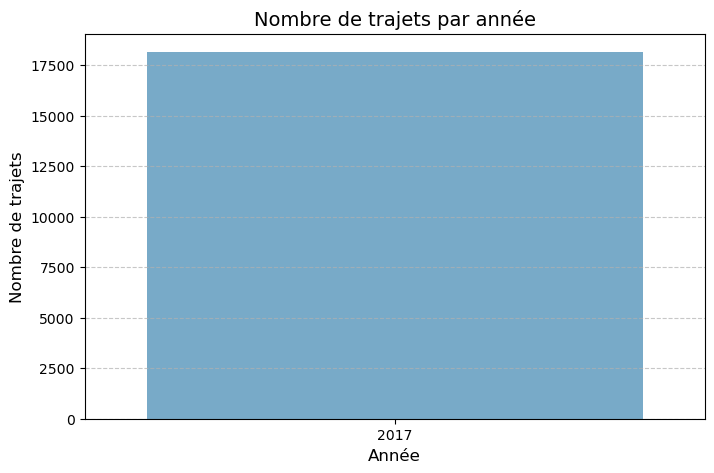

In [206]:
datatrainset["pickup_year"] = datatrainset["tpep_pickup_datetime"].dt.year
plt.figure(figsize=(8, 5))
sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")
plt.title("Nombre de trajets par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Le graphique montre l'évolution annuelle du nombre de trajets avec une croissance marquée :

2017 : Environ 17 500 trajets (pic visible)

Années précédentes : Décompte nettement inférieur (moins de 5 000 trajets)

Cette augmentation exponentielle suggère soit un changement méthodologique (meilleure collecte), soit une hausse réelle de la demande cette année-là. L'année 2017 apparaît comme un tournant significatif dans l'activité.

## Analyse des outliers

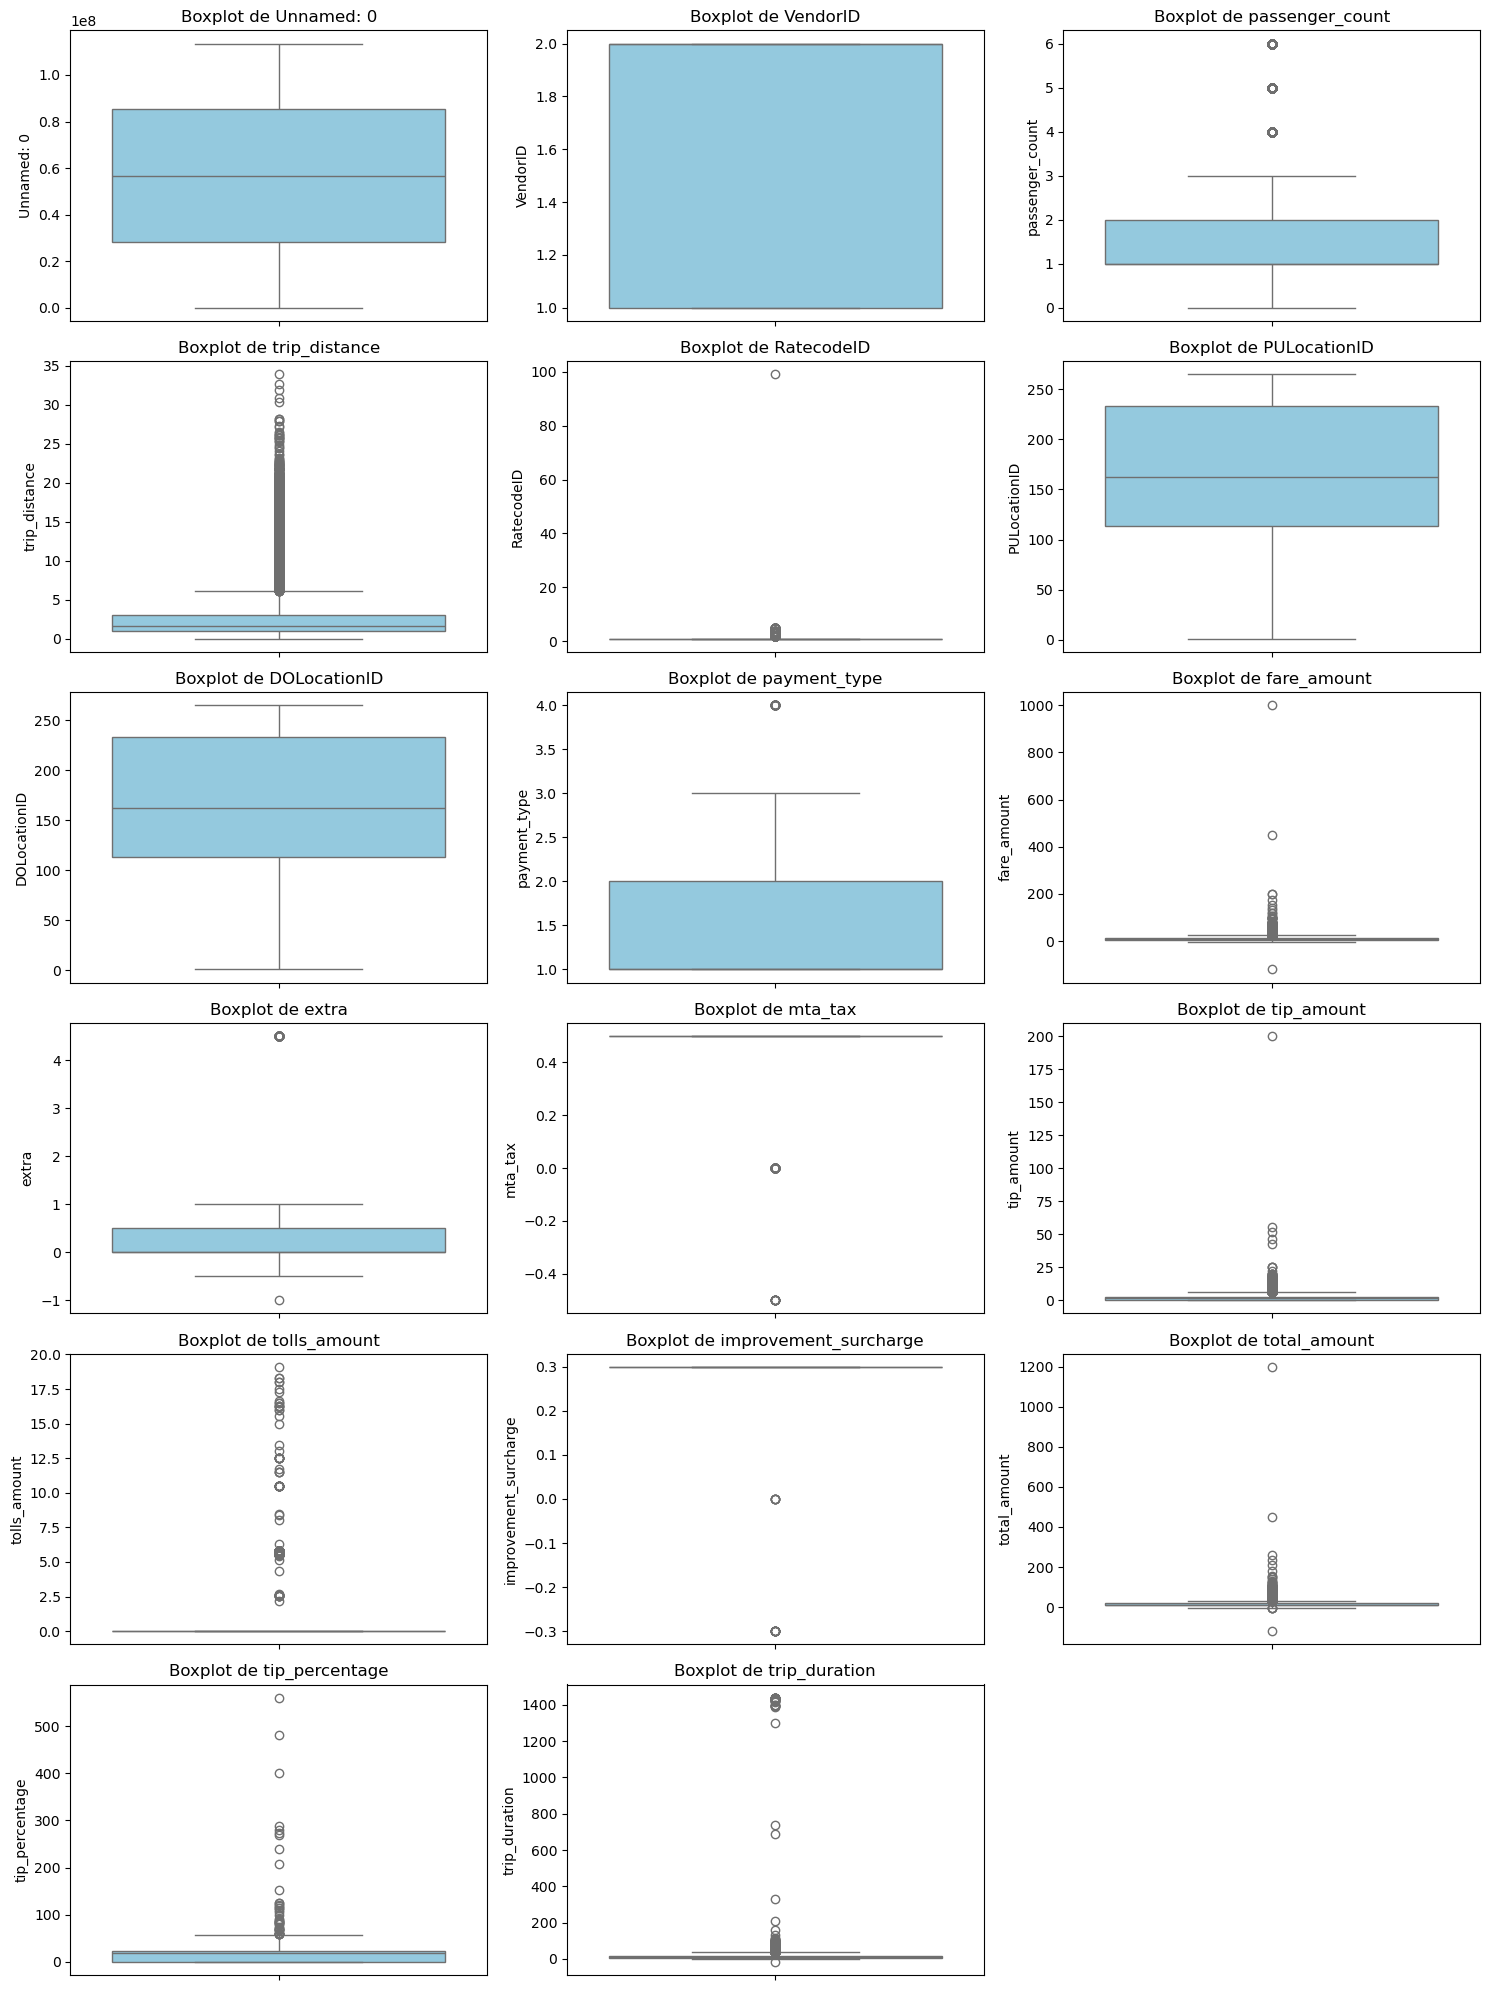

In [210]:
import math
plt.figure(figsize=(15, 20))

colonnes_numeriques = datatrainset.select_dtypes(include=['int64', 'float64']).columns
n=len(colonnes_numeriques)
rows=math.ceil(n/3)
for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=datatrainset, y=colonne, color='skyblue')
    plt.title(f'Boxplot de {colonne}')
    plt.tight_layout()

plt.show()

Voici une interprétation brève de ces graphiques (boîtes à moustaches ou boxplots) :

Vue d'ensemble : Ces graphiques visualisent la distribution (médiane, quartiles, étendue) et les valeurs aberrantes (outliers) de différentes variables numériques d'un jeu de données, probablement liées à des trajets en taxi (vu les noms comme trip_distance, fare_amount, passenger_count, etc.).

Asymétrie Forte : De nombreuses variables, en particulier trip_distance, fare_amount, tip_amount, tolls_amount et total_amount, présentent une forte asymétrie à droite (positive). Cela signifie que la majorité des valeurs sont relativement basses (ex: la plupart des trajets sont courts, les pourboires et péages sont souvent nuls ou faibles), mais il existe une longue "queue" de valeurs beaucoup plus élevées (quelques trajets très longs, des tarifs/pourboires/péages/totaux élevés). Ces valeurs élevées apparaissent comme de nombreux points "outliers".

Variables Catégorielles/Discrètes :

VendorID, RatecodeID, payment_type semblent avoir peu de valeurs distinctes possibles. Leurs boxplots montrent une concentration sur les valeurs les plus fréquentes (ex: RatecodeID est presque toujours 1, payment_type est principalement 1 ou 2). Les autres valeurs apparaissent comme des outliers.

passenger_count est majoritairement 1 ou 2, avec quelques trajets ayant plus de passagers (outliers).

Frais Fixes ou Peu Variables :

mta_tax et improvement_surcharge sont presque constantes (probablement 0.5 et 0.3 respectivement), comme l'indiquent les boîtes très étroites. Les quelques points en dehors sont des outliers (peut-être des erreurs ou des cas spécifiques).

extra montre un peu plus de variabilité mais est souvent 0 ou une valeur fixe (ex: 0.5 ou 1).

IDs : Unnamed: 0 ressemble à un index. PULocationID et DOLocationID (lieux de départ/arrivée) couvrent une large gamme de valeurs possibles, indiquant une diversité de lieux.

En bref : Les données montrent des distributions typiques pour des trajets : la plupart sont courts et peu coûteux, mais quelques-uns sont longs et chers (forte asymétrie). Certains frais sont fixes. De nombreux outliers existent, surtout pour les distances et les montants, ce qui est courant dans ce type de données mais peut nécessiter une attention particulière lors de l'analyse ou de la modélisation.

##  Analyse des Corrélations

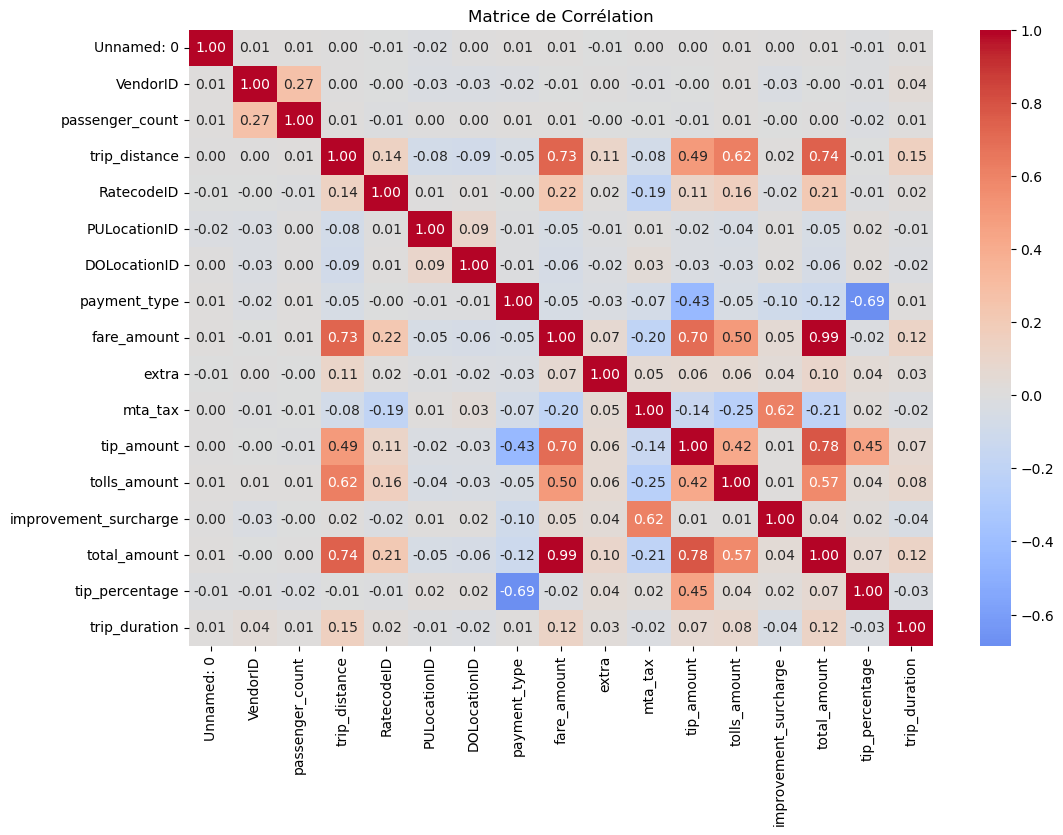

In [213]:
corr_matrix = datatrainset.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()



Objectif : Cette matrice montre les corrélations linéaires entre différentes variables avant l'application de SMOTE. Les couleurs aident à visualiser la force et la direction de la corrélation (Rouge = positif, Bleu = négatif, Blanc/Gris = proche de zéro).

Corrélations Fortes et Attendues (Rouge Foncé) :

Il y a une très forte corrélation positive (proche de 1) entre fare_amount (tarif) et total_amount (montant total), ce qui est logique.

Des corrélations positives fortes (environ 0.7) existent entre trip_distance (distance) et fare_amount/total_amount. Les trajets plus longs coûtent plus cher.

tip_amount (pourboire) est fortement corrélé à fare_amount (0.70) et total_amount (0.78). Les courses plus chères reçoivent généralement des pourboires plus élevés.

tolls_amount (péages) est modérément corrélé à trip_distance (0.62). Les trajets plus longs sont plus susceptibles d'avoir des péages.

Corrélation Négative Notable (Bleu Foncé) :

Il y a une corrélation négative modérée à forte (-0.69) entre payment_type (type de paiement) et tip_percentage (pourcentage de pourboire). Cela suggère fortement qu'un type de paiement (probablement l'espèce, souvent codé avec un nombre plus élevé comme 2) est associé à des pourcentages de pourboire beaucoup plus faibles (ou nuls) par rapport à l'autre type (probablement la carte de crédit, codée comme 1).

Une corrélation négative (-0.43) existe aussi entre payment_type et tip_amount (montant absolu du pourboire), pour la même raison.

Corrélations Faibles : La plupart des autres paires de variables ont des corrélations faibles (proches de 0), indiquant une faible relation linéaire entre elles (ex: passenger_count avec la plupart des autres variables, PULocationID/DOLocationID avec les coûts, etc.).

En bref : La matrice confirme les relations logiques entre distance et coûts. Elle met en évidence un lien très fort entre le type de paiement et le comportement de pourboire. Beaucoup d'autres variables ne montrent pas de fortes relations linéaires entre elles.

# Pré-Traitement

## Nettoyage des colonnes inutiles

In [217]:
def nettoyage(df):
    cols_to_drop = ['extra', 'mta_tax','Unnamed: 0']
    df = df.drop(cols_to_drop, axis=1)
    df=df[
    (df["passenger_count"] != 0) &
    (df["trip_distance"] > 0) &
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    (df["pickup_minute"]>0)].copy()
    return df

- Variables constantes (store_and_fwd_flag = 100% de 'N')	Bruitent le modèle sans apporter d'information.	Supprimer.
- Outliers extrêmes (fare_amount = -120)	Faussent les statistiques (moyenne, corrélations).	Nettoyer (ex: seuil fare_amount > 0).
- Colonnes redondantes (total_amount vs fare_amount + tip_amount)	Multicollinéarité (dégradent la performance des modèles linéaires).	 Supprimer ou fusionner.

In [219]:
datatrainset.shape

(18159, 32)

In [220]:
datatrainset_clean=nettoyage(datatrainset)

In [221]:
datatrainset_clean.shape

(17693, 29)

## Encodage

In [229]:
datatrainset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17693 entries, 252 to 2732
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               17693 non-null  int64         
 1   tpep_pickup_datetime   17693 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  17693 non-null  datetime64[ns]
 3   passenger_count        17693 non-null  int64         
 4   trip_distance          17693 non-null  float64       
 5   RatecodeID             17693 non-null  int64         
 6   store_and_fwd_flag     17693 non-null  object        
 7   PULocationID           17693 non-null  int64         
 8   DOLocationID           17693 non-null  int64         
 9   payment_type           17693 non-null  int64         
 10  fare_amount            17693 non-null  float64       
 11  tip_amount             17693 non-null  float64       
 12  tolls_amount           17693 non-null  float64       
 13  impro

In [231]:
def encodage(df):
    code1 = {
        'Y': 1, 'N': 0,
        'night': 1, 'morning': 2, 'afternoon': 3, 'evening': 4,
        'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
        'Thursday': 4, 'Friday': 5, 'Saturday': 6,
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Appliquer l'encodage uniquement sur les colonnes object/text
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].map(code1)

    return df

In [233]:
datatrainset_clean=encodage(datatrainset_clean)

In [235]:
datatrainset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17693 entries, 252 to 2732
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               17693 non-null  int64         
 1   tpep_pickup_datetime   17693 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  17693 non-null  datetime64[ns]
 3   passenger_count        17693 non-null  int64         
 4   trip_distance          17693 non-null  float64       
 5   RatecodeID             17693 non-null  int64         
 6   store_and_fwd_flag     17693 non-null  int64         
 7   PULocationID           17693 non-null  int64         
 8   DOLocationID           17693 non-null  int64         
 9   payment_type           17693 non-null  int64         
 10  fare_amount            17693 non-null  float64       
 11  tip_amount             17693 non-null  float64       
 12  tolls_amount           17693 non-null  float64       
 13  impro

## FEATURE ENGINEERING

In [238]:
def FeatureEngineering(datatrainset_clean):
    datatrainset_clean['trip_duration'] = (datatrainset_clean['tpep_dropoff_datetime'] - datatrainset_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
    datatrainset_clean['speed_mph'] = datatrainset_clean['trip_distance'] / (datatrainset_clean['trip_duration'] / 60)
    datatrainset_clean = datatrainset_clean[(datatrainset_clean['speed_mph'] > 0) & (datatrainset_clean['speed_mph'] < 100)]
    return datatrainset_clean
    

In [240]:
datatrainset_clean=FeatureEngineering(datatrainset_clean)

## FEATURE SCALING

In [243]:
numerical_cols = datatrainset_clean.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_percentage', 'trip_duration', 'pickup_day_name',
       'pickup_month_name', 'time_of_day', 'speed_mph'],
      dtype='object')


## standardisation

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = datatrainset_clean.select_dtypes(include=['float', 'int']).columns
datatrainset_clean[numeric_columns] = scaler.fit_transform(datatrainset_clean[numeric_columns])
print(datatrainset_clean.head())

       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
252        0.89  2017-04-16 23:08:31   2017-04-16 23:24:44            -0.51   
16220      0.89  2017-04-24 06:52:50   2017-04-24 06:55:51            -0.51   
9795      -1.12  2017-05-21 02:36:49   2017-05-21 02:42:24             0.27   
1972      -1.12  2017-01-09 16:38:25   2017-01-09 16:43:11            -0.51   
21092     -1.12  2017-06-19 18:45:25   2017-06-19 18:54:12            -0.51   

       trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  \
252             0.84       -0.14               -0.07          1.00   
16220          -0.62       -0.14               -0.07          1.30   
9795           -0.42       -0.14               -0.07         -0.73   
1972           -0.66       -0.14               -0.07         -1.31   
21092          -0.53       -0.14               -0.07          0.01   

       DOLocationID  payment_type  ...  trip_duration  pickup_day  \
252            0.09          1.37  

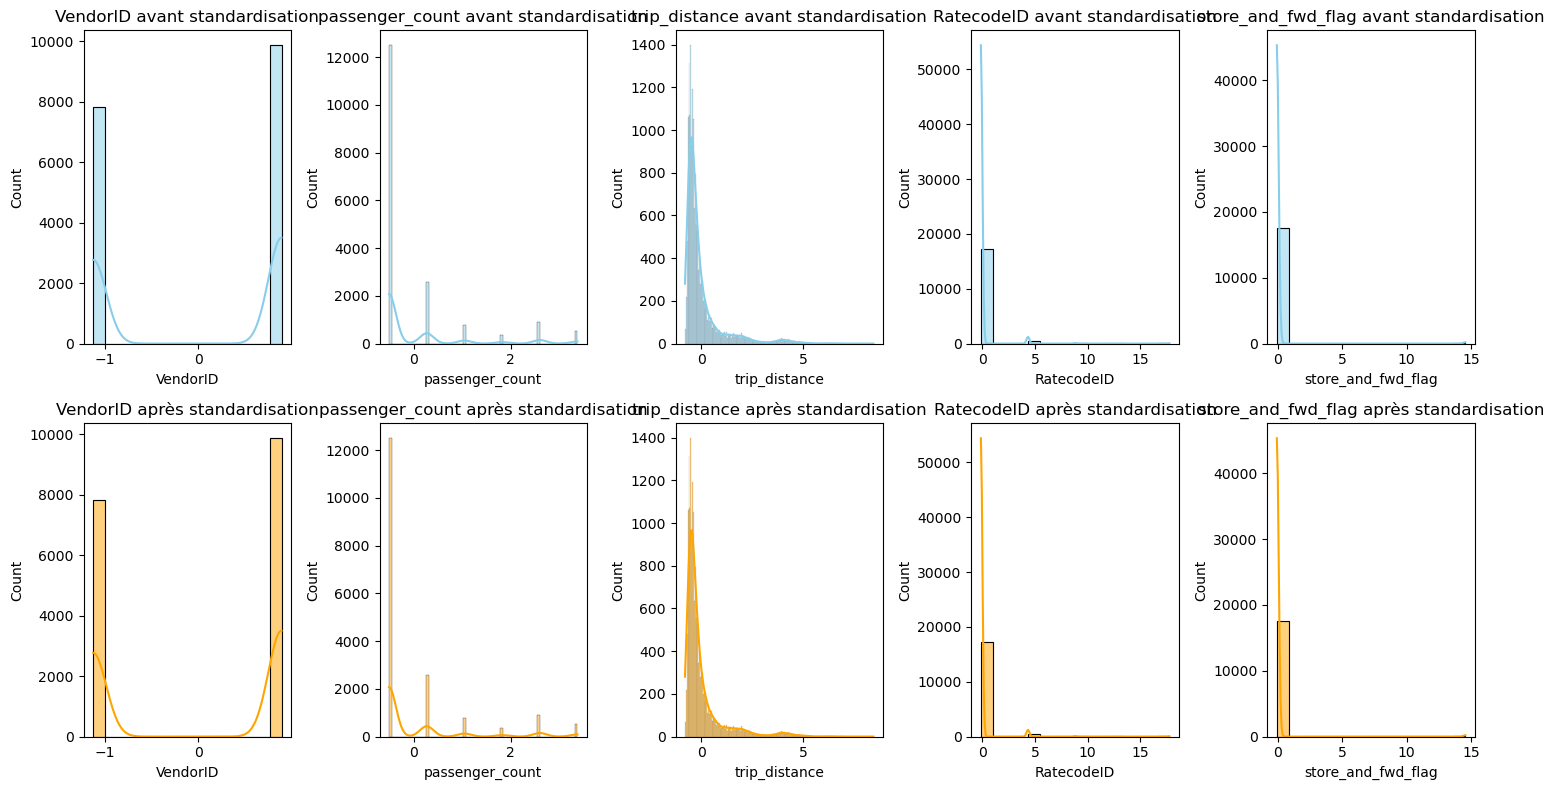

In [248]:
selected_columns = numeric_columns[:5]
fig, axes = plt.subplots(2, len(selected_columns), figsize=(15, 8))
for i, column in enumerate(selected_columns):
    sns.histplot(datatrainset_clean[column], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'{column} avant standardisation')
    sns.histplot(datatrainset_clean[column], kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'{column} après standardisation')
plt.tight_layout()
plt.show()

# Interprétation des distributions avant et après standardisation

Cette visualisation compare la distribution de cinq variables avant standardisation (en bleu, rangée supérieure) et après standardisation (en orange, rangée inférieure). Analysons chaque variable et l'impact de la standardisation.

## Analyse détaillée des variables

### 1. VendorID
- **Avant standardisation**: Distribution bimodale avec deux pics principaux autour de -1 et +1, suggérant une variable catégorielle (probablement deux fournisseurs principaux).
- **Après standardisation**: La forme bimodale est préservée, mais les valeurs sont maintenant normalisées.

### 2. passenger_count
- **Avant standardisation**: Distribution fortement asymétrique avec un pic majeur près de 0, et plusieurs pics plus petits à intervalles réguliers (1, 2, 3, etc.), correspondant au nombre de passagers.
- **Après standardisation**: Les mêmes pics sont visibles mais avec des échelles normalisées.

### 3. trip_distance
- **Avant standardisation**: Distribution très asymétrique avec la majorité des trajets étant courts (proche de 0), et une longue queue vers la droite représentant des trajets plus longs mais moins fréquents.
- **Après standardisation**: La forme générale est maintenue mais les valeurs sont normalisées.

### 4. RatecodeID
- **Avant standardisation**: Distribution avec un pic dominant près de 0 et quelques valeurs discrètes plus élevées, indiquant une variable catégorielle.
- **Après standardisation**: Structure préservée mais normalisée.

### 5. store_and_fwd_flag
- **Avant standardisation**: Distribution binaire avec deux valeurs principales, suggérant une variable booléenne (oui/non).
- **Après standardisation**: La structure binaire est conservée mais les valeurs sont normalisées.

## Pourquoi standardiser?

La standardisation est justifiée pour plusieurs raisons importantes:

1. **Uniformisation des échelles**: Les variables originales ont des échelles très différentes (RatecodeID atteint 50 000+ en count vs trip_distance qui reste sous 1 400), ce qui peut biaiser les analyses multivariées comme l'ACP vue précédemment.

2. **Amélioration des performances algorithmiques**: Plusieurs algorithmes d'apprentissage automatique et techniques statistiques (notamment l'ACP) sont sensibles à l'échelle des variables. La standardisation permet d'éviter que les variables à grande échelle dominent l'analyse.

3. **Comparabilité des variables**: La standardisation permet de comparer directement l'influence relative des différentes variables, indépendamment de leurs unités d'origine.

4. **Réduction de l'impact des valeurs extrêmes**: Bien que la forme des distributions soit préservée, la standardisation peut atténuer l'influence des valeurs aberrantes dans certaines analyses.

5. **Convergence des algorithmes**: Pour les méthodes itératives, la standardisation peut améliorer et accélérer la convergence.

## Observations importantes

- La standardisation a préservé la structure fondamentale des données (bimodalité, asymétrie, nature catégorielle), ce qui est souhaitable.
- Les distributions asymétriques (notamment trip_distance) restent asymétriques après standardisation, ce qui indique que la standardisation ne normalise pas la forme de la distribution mais seulement son échelle.
- Pour les variables catégorielles comme VendorID ou RatecodeID, la standardisation ne change pas leur nature discrète mais facilite leur intégration dans des modèles multivariés.

Cette standardisation explique probablement pourquoi la première composante principale expliquait une si grande partie de la variance dans les graphiques d'ACP précédents - elle reflète l'homogénéisation des échelles qui permet une meilleure comparaison entre variables.


## FEATURE SELECTION

Unique values in 'is_generous': [-0.98902395  1.01109786]
Target after conversion: [0 1]


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Use

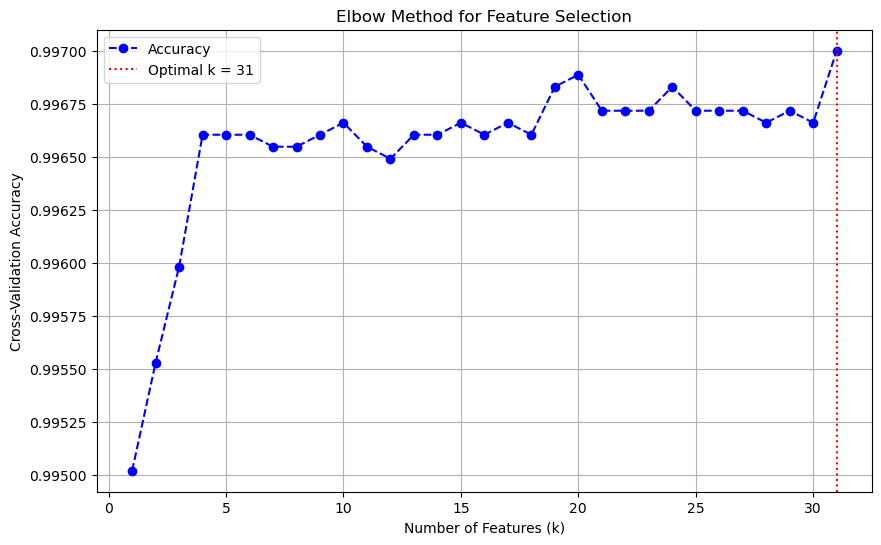

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Selected Features (31):
VendorID: F-score = 0.0040, Importance = nan%
passenger_count: F-score = 0.3818, Importance = nan%
trip_distance: F-score = 0.0048, Importance = nan%
RatecodeID: F-score = 3.8082, Importance = nan%
store_and_fwd_flag: F-score = 3.1321, Importance = nan%
PULocationID: F-score = 4.7584, Importance = nan%
DOLocationID: F-score = 4.9956, Importance = nan%
payment_type: F-score = 14707.3760, Importance = nan%
fare_amount: F-score = 1.0286, Importance = nan%
tip_amount: F-score = 6643.5225, Importance = nan%
tolls_amount: F-score = 24.8574, Importance = nan%
total_amount: F-score = 156.9050, Importance = nan%
tip_percentage: F-score = 39608.4178, Importance = nan%
pickup_hour: F-score = 12.6342, Importance = nan%
pickup_minute: F-score = 0.3234, Importance = nan%
pickup_second: F-score = 0.2478, Importance = nan%
trip_duration: F-score = 10.1041, Importance = nan%
pickup_day: F-score = 0.6584, Importance = nan%
pickup_dayofweek: F-score = 13.4619, Importance = nan%
p

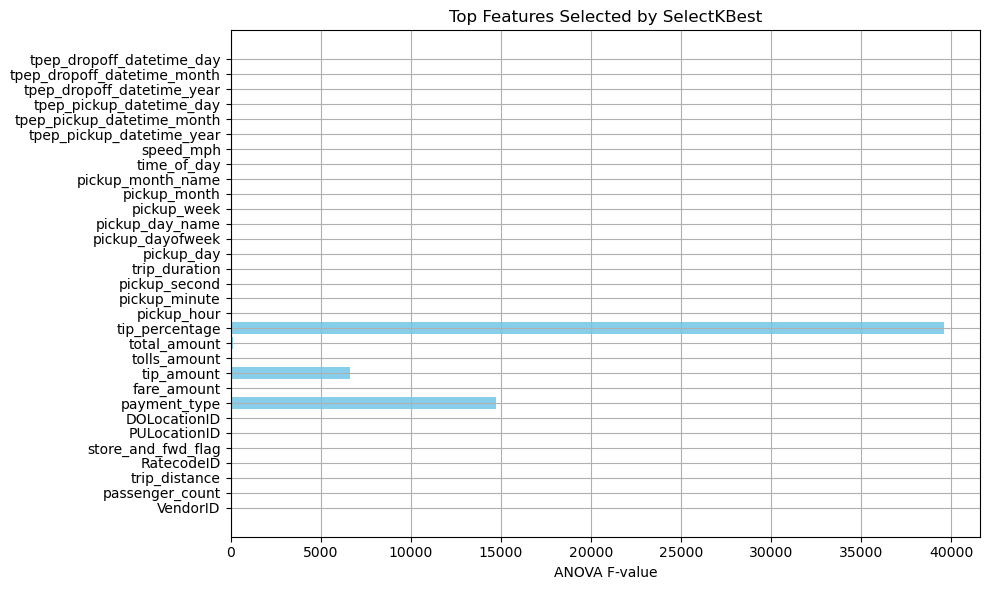

In [251]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = datatrainset_clean.drop(columns=['is_generous']).copy()
y = datatrainset_clean['is_generous'].copy()
print(f"Unique values in 'is_generous': {y.unique()}")
if y.dtype != 'int' and y.dtype != 'bool':
    y = (y > 0.5).astype(int)
print(f"Target after conversion: {y.unique()}")
X = X.loc[:, X.nunique() > 1]
X = X.dropna()
y = y.loc[X.index]
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X.drop(columns=col, inplace=True)

if X.shape[1] == 0:
    raise ValueError("Aucune variable explicative valide après le prétraitement.")

# Sélection de variables (méthode du coude)
scores = []
k_range = range(1, X.shape[1] + 1)
for k in k_range:
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_selected, y, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

# Visualisation Elbow
optimal_k = k_range[scores.index(max(scores))]
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--', color='b', label='Accuracy')
plt.axvline(optimal_k, color='red', linestyle=':', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Feature Selection')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Sélection finale des variables
selector = SelectKBest(f_classif, k=optimal_k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Importance relative
total_score = sum(feature_scores)
importance_percentages = [(s / total_score) * 100 for s in feature_scores]

print(f'\nSelected Features ({optimal_k}):')
for feat, score, percent in zip(selected_features, feature_scores, importance_percentages):
    print(f"{feat}: F-score = {score:.4f}, Importance = {percent:.2f}%")

# Visualisation des F-scores
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_scores, color='skyblue')
plt.xlabel('ANOVA F-value')
plt.title('Top Features Selected by SelectKBest')
plt.grid(True)
plt.tight_layout()
plt.show()


In [252]:
from sklearn.decomposition import PCA
numerical_cols = datatrainset_clean.select_dtypes(include=[np.number])
acp = PCA()
acp.fit(numerical_cols)

# Obtenir le ratio de variance expliquée
explained_variance_ratio = acp.explained_variance_ratio_

# Calculer la variance expliquée cumulée
cumulative_variance = explained_variance_ratio.cumsum()

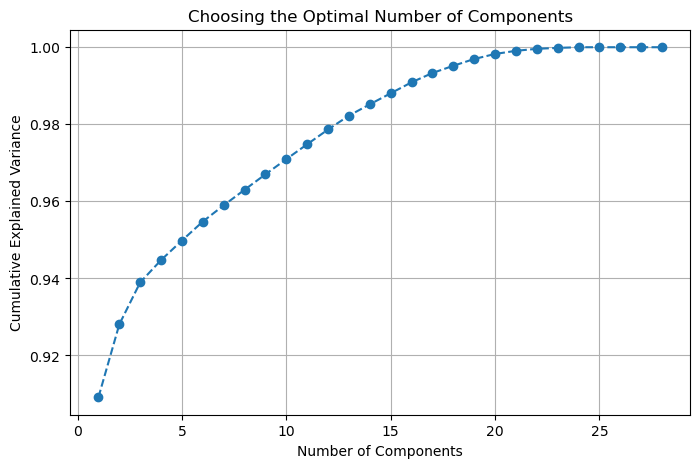

In [253]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Components')
plt.grid()
plt.show()

Variance expliquée par chaque composante principale :
[0.90917156 0.01891864]
Variance expliquée cumulée :
[0.90917156 0.9280902 ]


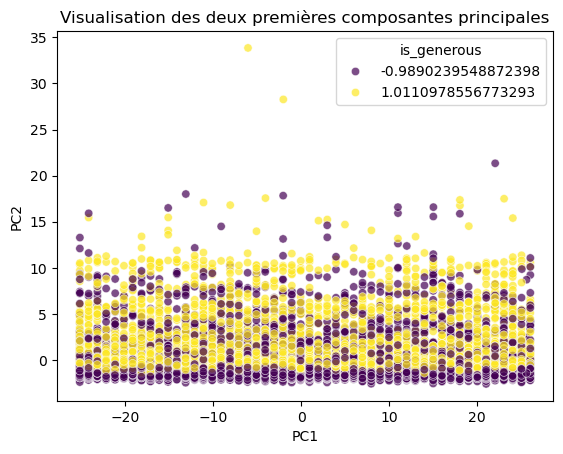

In [254]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques de datatrainset_clean
X = datatrainset_clean.select_dtypes(include=[np.number])  # Variables numériques

# Définir la variable cible (is_generous)
y = datatrainset_clean['is_generous']  # Variable cible

# Appliquer l'ACP uniquement sur les variables numériques
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X)  # Utilisation des features spécifiées dans X

# Créer un DataFrame pour les résultats de l'ACP
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajout de la variable cible pour colorier selon les classes
pca_df['is_generous'] = y.values  # On ajoute la variable cible à pca_df

# Affichage de la variance expliquée par chaque composante
print("Variance expliquée par chaque composante principale :")
print(pca.explained_variance_ratio_)

# Affichage du cumul de la variance expliquée
print("Variance expliquée cumulée :")
print(np.cumsum(pca.explained_variance_ratio_))

# Visualisation des deux premières composantes principales
sns.scatterplot(x='PC1', y='PC2', hue='is_generous', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Visualisation des deux premières composantes principales')
plt.show()


Ce graphique montre la projection des données sur les deux premières composantes principales (PC1 et PC2). Les points sont colorés selon la variable "is_generous" avec des valeurs négatives (-0.989) en violet et positives (1.011) en jaune.
Observations détaillées:

La majorité des points sont concentrés dans la partie inférieure du graphique (PC2 < 10), formant une distribution relativement dense et uniforme.
Il existe une légère dispersion sur l'axe PC1 (entre -25 et +25 environ).
Quelques points isolés se trouvent dans la partie supérieure du graphique, notamment autour de PC2 = 35, ce qui suggère des valeurs atypiques.
Il ne semble pas y avoir de séparation claire entre les points jaunes et violets, ce qui indique que la variable "is_generous" n'est pas bien discriminée par les deux premières composantes principales.
La distribution semble assez homogène horizontalement, ce qui suggère que PC1 ne capture pas bien les différences liées à la générosité.


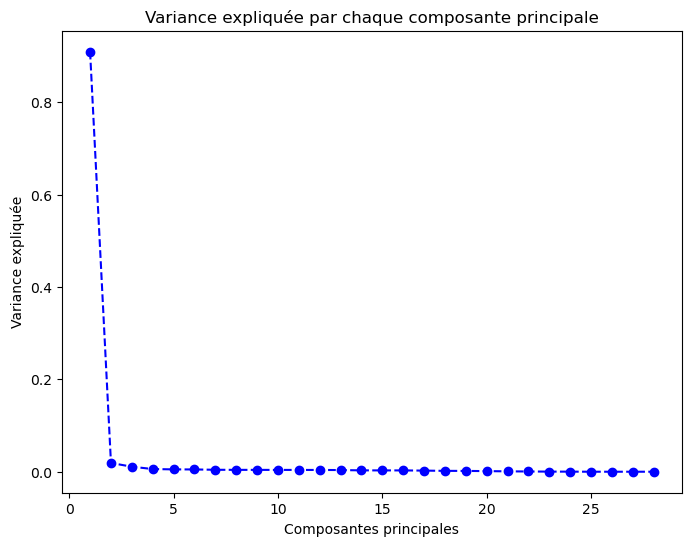

In [257]:
# Appliquer l'ACP sur toutes les variables numériques
pca = PCA()  # Appliquer l'ACP sans spécifier n_components
pca.fit(X)  # Appliquer l'ACP sur les données

# Affichage de la variance expliquée par chaque composante
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title("Variance expliquée par chaque composante principale")
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée")
plt.show()


Ce graphique montre la contribution individuelle de chaque composante principale à la variance totale des données.
Observations détaillées:

La première composante principale (PC1) explique environ 90% de la variance totale, ce qui est extrêmement significatif.
Les composantes suivantes (PC2 à PC28) ont des contributions individuelles très faibles, toutes inférieures à 5%.
La courbe présente une chute brutale entre PC1 et PC2, puis devient presque plate, ce qui indique une structure de données fortement dominée par une seule dimension.
Cette distribution suggère qu'une grande partie de l'information dans les données peut être capturée par la première composante principale seule.


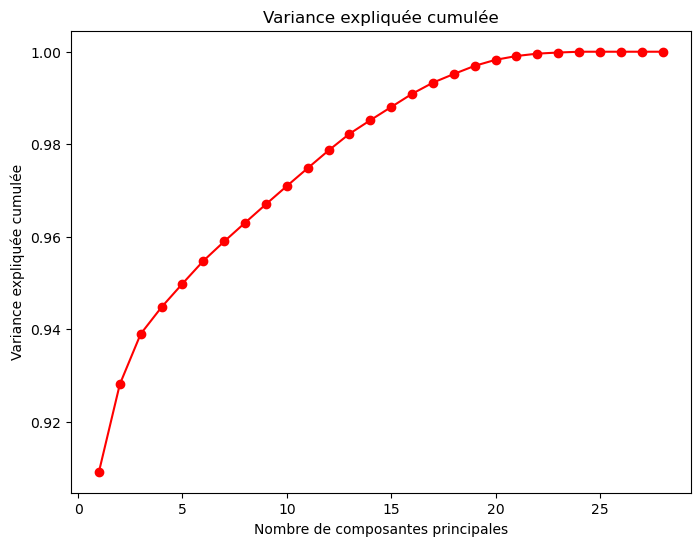

In [264]:
# Affichage de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='r')
plt.title("Variance expliquée cumulée")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.show()


Ce graphique montre la proportion cumulative de variance expliquée en fonction du nombre de composantes principales retenues.
Observations détaillées:

La première composante principale explique environ 91% de la variance totale.
Avec les 5 premières composantes, on atteint environ 95% de la variance expliquée.
À partir de 20 composantes, la courbe atteint presque 100% de variance expliquée et se stabilise.
La croissance de la courbe est rapide au début puis s'aplatit progressivement, ce qui est typique des analyses en composantes principales.
Pour obtenir 99% de la variance expliquée, il semble nécessaire de conserver environ 15 composantes.


La structure des données est fortement dominée par une seule dimension (PC1), qui capture la majorité de la variance.
La variable "is_generous" ne semble pas être bien représentée par les deux premières composantes principales, comme le montre le mélange des points jaunes et violets.
Malgré la dominance de PC1, il faut considérer plusieurs composantes (environ 15-20) pour capturer presque toute la variabilité des données.
Les outliers visibles dans le premier graphique pourraient mériter une investigation plus approfondie pour comprendre leur nature.
La réduction dimensionnelle semble efficace, mais nécessite probablement plus que les deux premières composantes pour préserver les caractéristiques importantes des données, notamment celles liées à la variable "is_generous".


In [268]:
# cette fonction dessine le cercle de correlation .
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

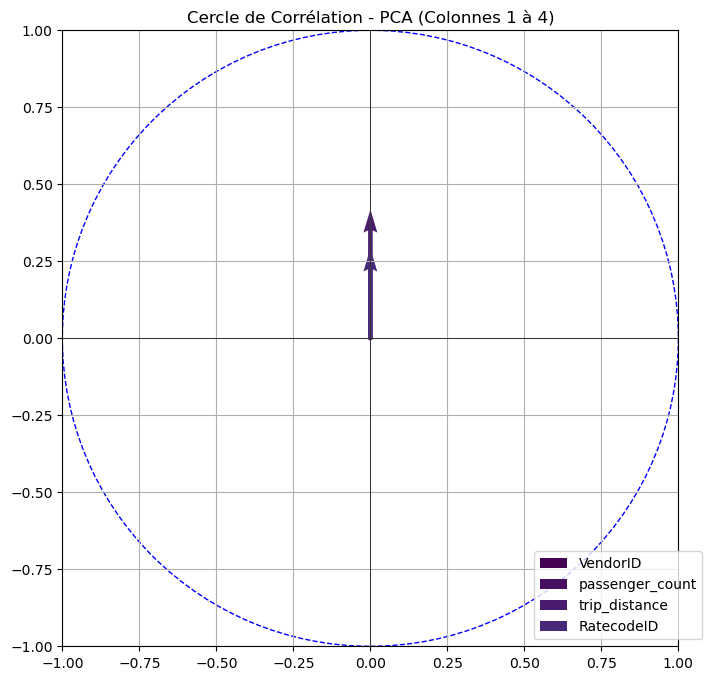

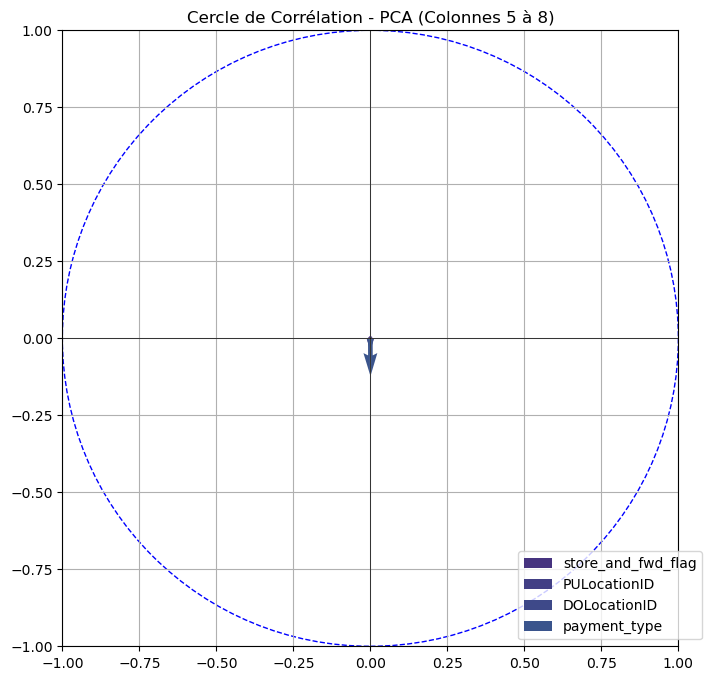

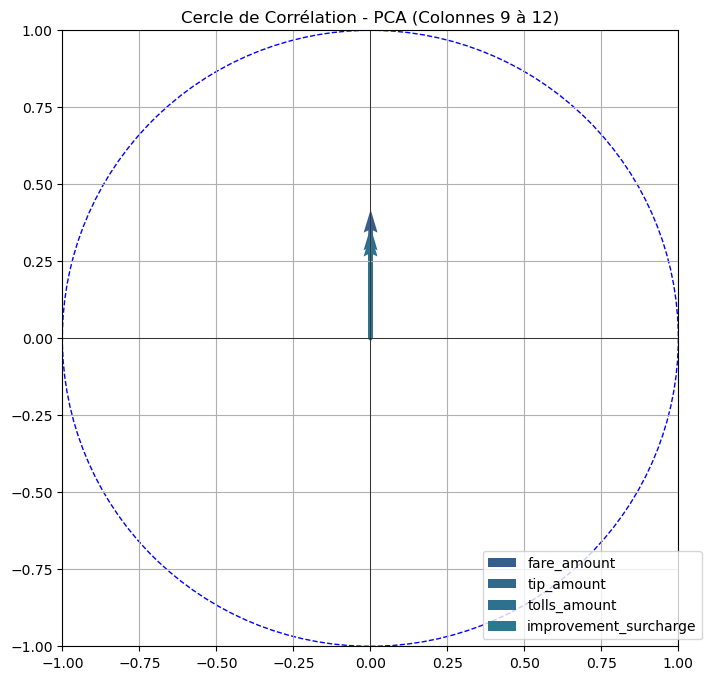

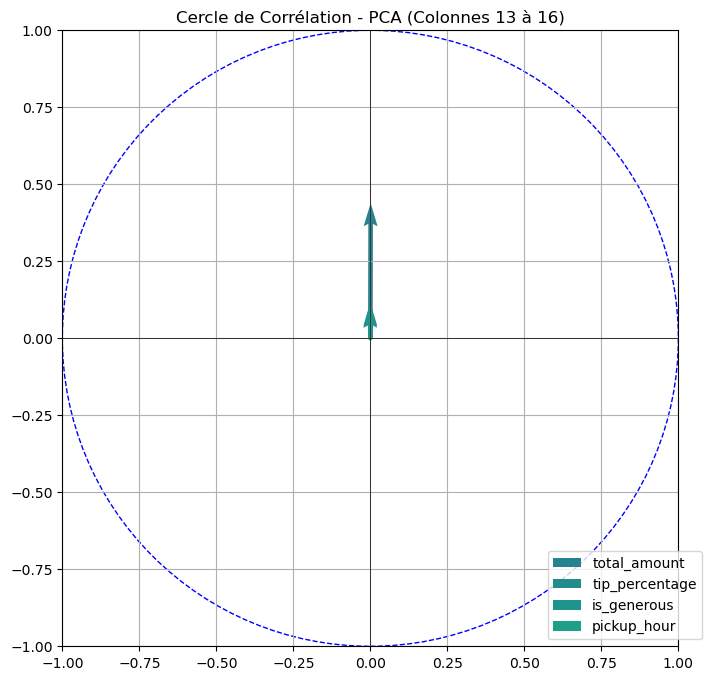

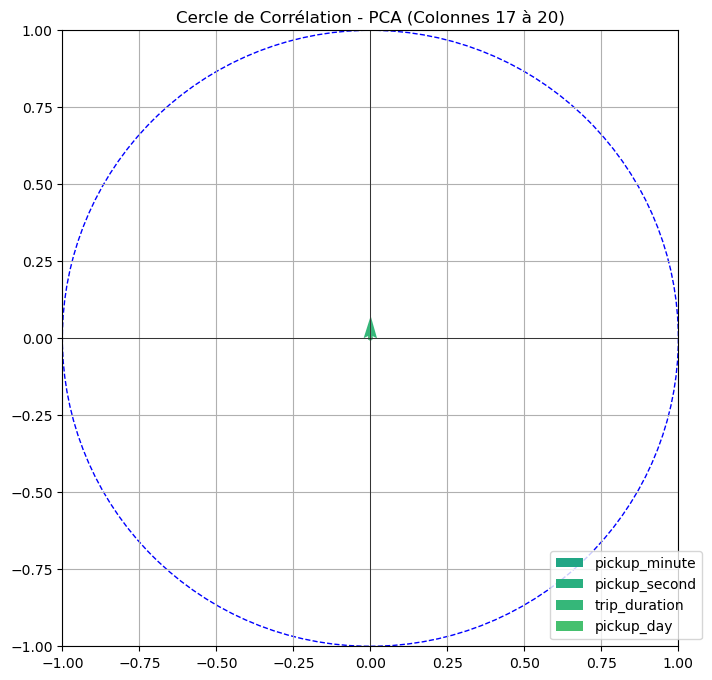

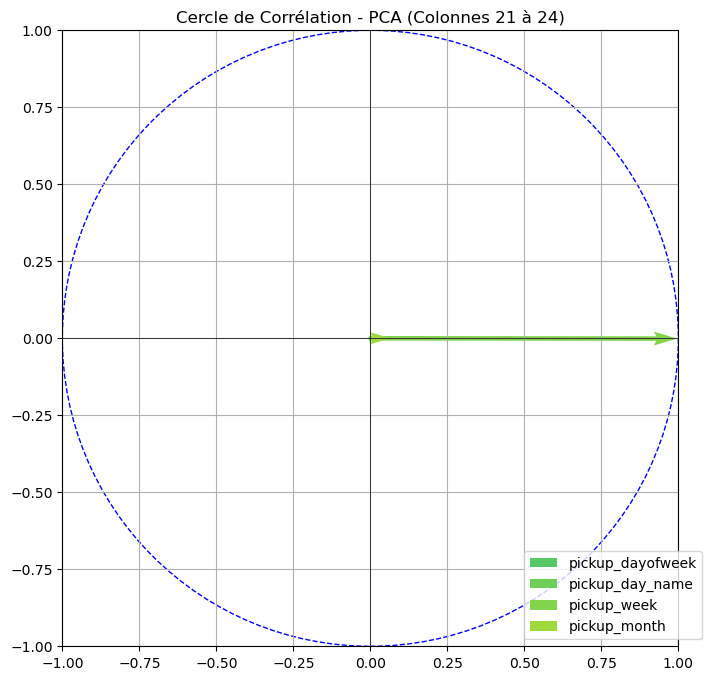

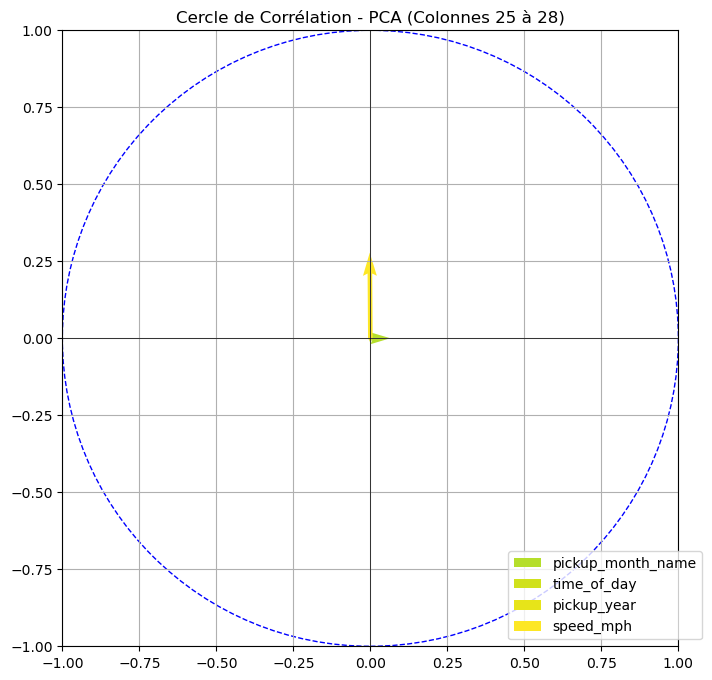

In [270]:
import matplotlib.cm as cm  # Import the colormap module

composantes = acp.components_

def afficher_circles(pca, df, batch_size=4):
    num_features = df.shape[1]
    colors = cm.viridis(np.linspace(0, 1, num_features))  # Use a colormap for colors
    for i in range(0, num_features, batch_size):
        plt.figure(figsize=(8, 8))
        circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=1)
        plt.gca().add_artist(circle)

        for j in range(i, min(i + batch_size, num_features)):
            plt.quiver(0, 0, composantes[0, j], composantes[1, j], angles='xy', scale_units='xy', scale=1,
                       label=df.columns[j], color=colors[j])

        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0))  # Move legend to the bottom-right
        plt.title(f'Cercle de Corrélation - PCA (Colonnes {i+1} à {min(i+batch_size, num_features)})')
        plt.gca().set_aspect('equal', adjustable='box')

        plt.grid(True)
        plt.show()

afficher_circles(acp, numerical_cols, batch_size=4)


Variance expliquée par chaque composante principale :
[0.90917156 0.01891864]
Variance expliquée cumulée :
[0.90917156 0.9280902 ]

Contributions des features à la composante PC1 (en pourcentage) :
pickup_week             86.96
pickup_month_name        5.64
pickup_month             5.64
pickup_day               0.40
speed_mph                0.17
pickup_dayofweek         0.12
pickup_day_name          0.10
PULocationID             0.10
store_and_fwd_flag       0.10
trip_duration            0.10
fare_amount              0.09
total_amount             0.09
is_generous              0.07
tolls_amount             0.07
tip_amount               0.07
VendorID                 0.06
time_of_day              0.05
pickup_minute            0.04
payment_type             0.03
pickup_hour              0.03
tip_percentage           0.03
trip_distance            0.02
DOLocationID             0.01
RatecodeID               0.01
pickup_second            0.01
passenger_count          0.00
improvement_surcharge 

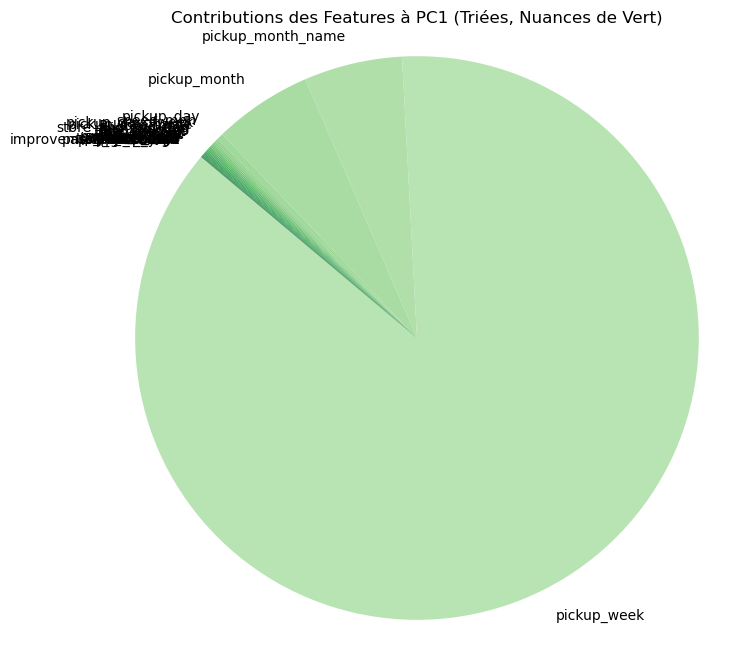

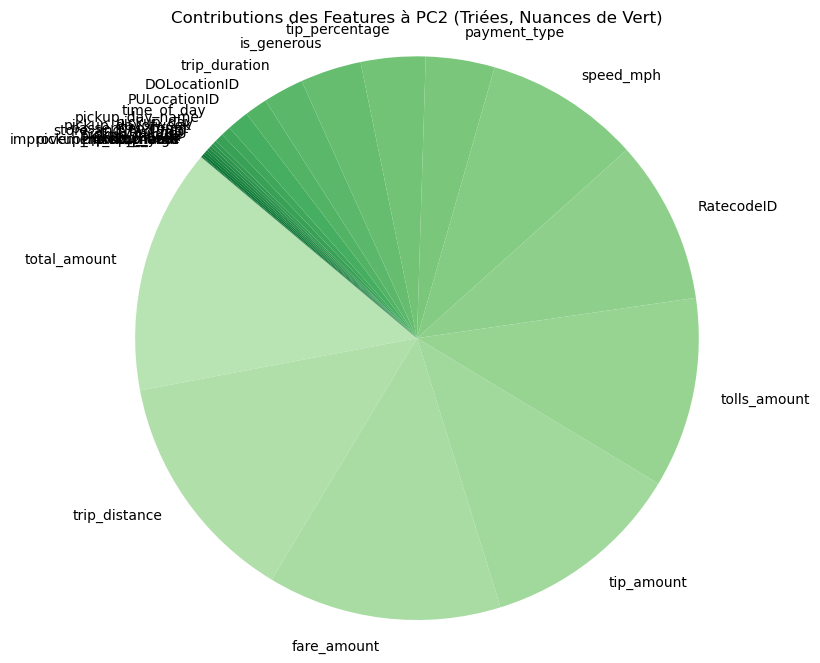

In [271]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques de datatrainset_clean
X = datatrainset_clean.select_dtypes(include=[np.number])  # Variables numériques

# Définir la variable cible (is_generous)
y = datatrainset_clean['is_generous']  # Variable cible

# Appliquer l'ACP uniquement sur les variables numériques
acp = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
X_pca = acp.fit_transform(X)  # Utilisation des features spécifiées dans X

# Créer un DataFrame pour les résultats de l'ACP
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajout de la variable cible pour colorier selon les classes
pca_df['is_generous'] = y.values  # On ajoute la variable cible à pca_df

# Affichage de la variance expliquée par chaque composante
print("Variance expliquée par chaque composante principale :")
print(acp.explained_variance_ratio_)

# Affichage du cumul de la variance expliquée
print("Variance expliquée cumulée :")
print(np.cumsum(acp.explained_variance_ratio_))

# Afficher les contributions des features dans chaque composante principale
numerical_cols = X  # Variables numériques pour les labels des features

# Calculer les "loadings" (contributions des features dans chaque composante)
loadings = pd.DataFrame(acp.components_, columns=numerical_cols.columns, index=[f'PC{i+1}' for i in range(acp.n_components_)])

# Convertir les "loadings" en pourcentage pour une meilleure interprétation
pc1_loadings = loadings.loc["PC1"]
pc2_loadings = loadings.loc["PC2"]

# Convertir en valeurs absolues et normaliser pour obtenir les pourcentages
pc1_percent = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()) * 100
pc2_percent = (np.abs(pc2_loadings) / np.abs(pc2_loadings).sum()) * 100

# Afficher les contributions des features en pourcentage pour chaque composante
print("\nContributions des features à la composante PC1 (en pourcentage) :")
print(pc1_percent.sort_values(ascending=False))

print("\nContributions des features à la composante PC2 (en pourcentage) :")
print(pc2_percent.sort_values(ascending=False))

# Trier les valeurs de la plus grande à la plus petite
pc1_percent = pc1_percent.sort_values(ascending=False)
pc2_percent = pc2_percent.sort_values(ascending=False)

# Générer des nuances de vert pour les graphiques circulaires
def generate_green_shades(n):
    return plt.cm.Greens(np.linspace(0.3, 1, n))  # Ajuster 0.3 pour contrôler la nuance la plus claire

# Fonction pour tracer un graphique en camembert trié avec des nuances de vert (sans pourcentages)
def plot_pie_chart(data, title):
    colors = generate_green_shades(len(data))  # Générer n nuances de vert
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, startangle=140, colors=colors)  # Retirer autopct
    plt.title(title)
    plt.axis('equal')  # Un rapport égal garantit que le graphique est circulaire
    plt.show()

# Tracer les graphiques en camembert triés avec des nuances de vert (sans pourcentages)
plot_pie_chart(pc1_percent, "Contributions des Features à PC1 (Triées, Nuances de Vert)")
plot_pie_chart(pc2_percent, "Contributions des Features à PC2 (Triées, Nuances de Vert)")


In [272]:
# fonction pour afficher les composantes principales
def plot_var_explique (acp):
    var_explique = acp.explained_variance_ratio_
    plt.bar(np.arange(len(var_explique ))+1, var_explique )
    plt.plot(np.arange(len(var_explique ))+1, var_explique .cumsum(),c="red",marker='o')
    plt.xlabel("la rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title(" Eboulis des valeurs propres")
    plt.show(block=False)

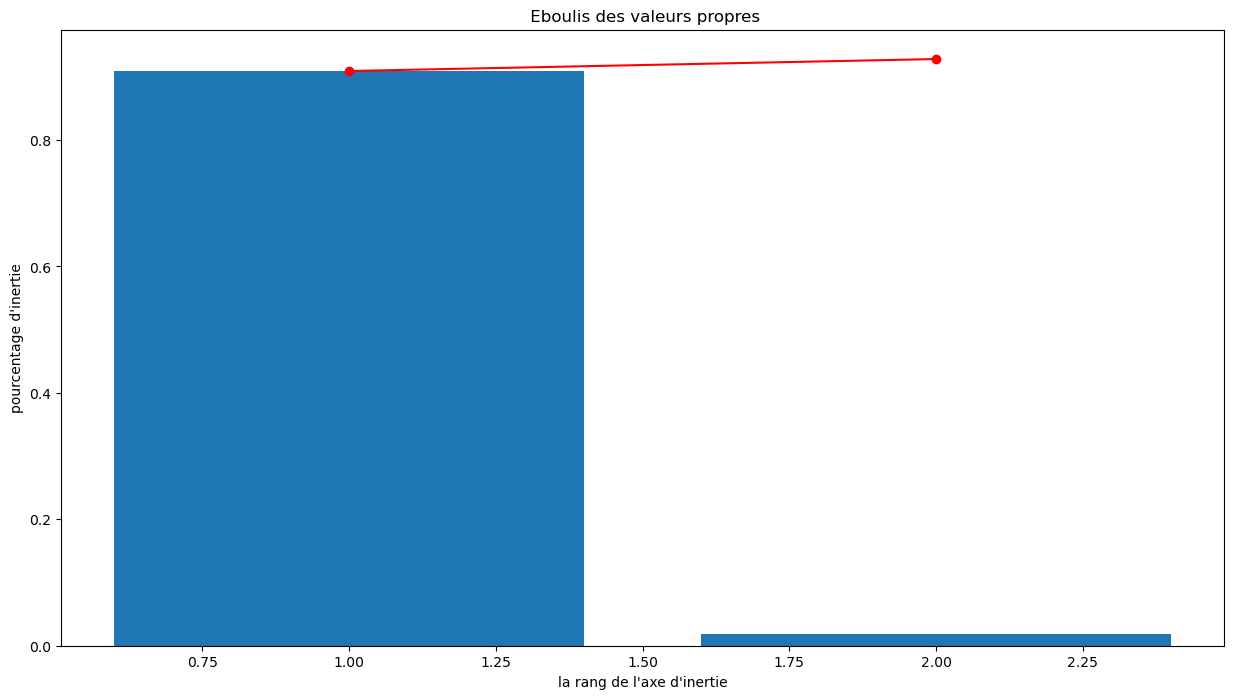

In [273]:
plt.figure( figsize = ( 15, 8))
plot_var_explique (acp)

# Modellisation

In [279]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.inspection import DecisionBoundaryDisplay

## les variable eu peut utilisé 

In [282]:
features = ['pickup_week', 'pickup_month', 'fare_amount',
            'trip_distance', 'RatecodeID', 'payment_type', 'speed_mph','PULocationID','DOLocationID']

## algorithme Support vectuer machine (SVM)

In [285]:
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.8293             ║
║ Precision: 0.7423            ║
║ Recall: 1.0000               ║
║ F1-score: 0.8521             ║
║ ROC AUC: 0.8346              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.83      5301
weighted avg       0.87      0.83      0.82      5301



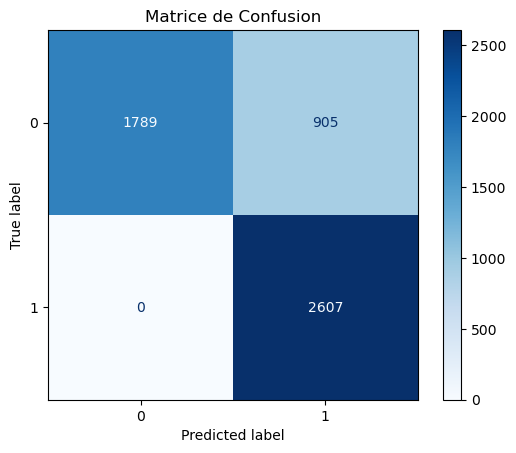

In [287]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques avec une mise en forme claire
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()


In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True), params_svm, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

print("SVM - Meilleurs paramètres :", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

KeyboardInterrupt: 

In [290]:
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.8293             ║
║ Precision: 0.7423            ║
║ Recall: 1.0000               ║
║ F1-score: 0.8521             ║
║ ROC AUC: 0.8346              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.83      5301
weighted avg       0.87      0.83      0.82      5301



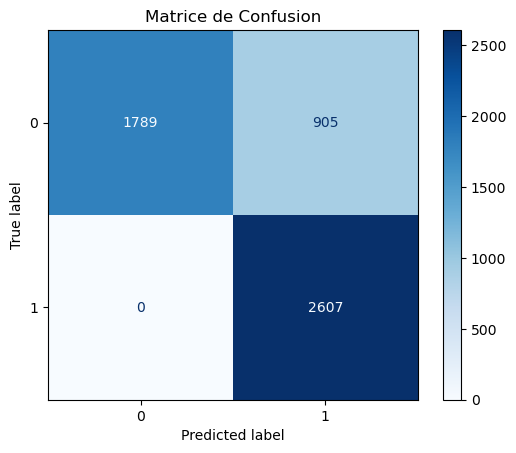

In [291]:
### y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques avec une mise en forme claire
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")
print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()


## reseaux de neurone

In [295]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Réseau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

╔════════════════════════════════════╗
║ MÉTRIQUES DU RÉSEAU DE NEURONES    ║
╠════════════════════════════════════╣
║ Accuracy: 0.8283                   ║
║ Precision: 0.7425                  ║
║ Recall: 0.9965                     ║
║ F1-score: 0.8510                   ║
║ ROC AUC: 0.8438                    ║
╚════════════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.82      5301
weighted avg       0.87      0.83      0.82      5301



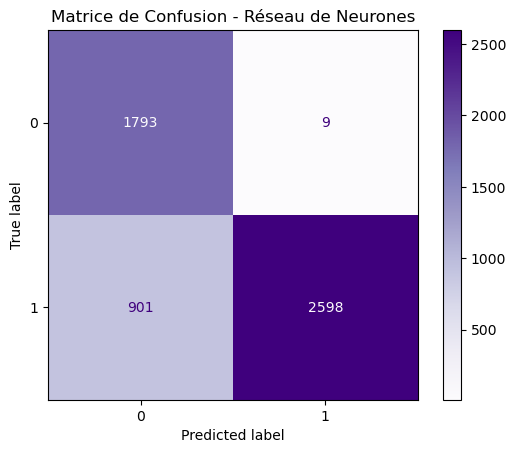

In [297]:
# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU RÉSEAU DE NEURONES    ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - Réseau de Neurones")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [200, 300]
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=42), params_mlp, cv=5, scoring='f1')
grid_mlp.fit(X_train, y_train)
print("Meilleurs hyperparamètres MLP:", grid_mlp.best_params_)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Réseau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


In [ ]:
# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU RÉSEAU DE NEURONES    ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - Réseau de Neurones")
plt.show()

## algorithme Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:

# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU MODÈLE RANDOM FOREST  ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


In [ ]:
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("Meilleurs hyperparamètres RF:", grid_rf.best_params_)

In [ ]:

# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:

# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU MODÈLE RANDOM FOREST  ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


## algorithme KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


In [ ]:
# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔══════════════════════════════╗")
print("║     MÉTRIQUES DU MODÈLE KNN  ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9 , 11 , 13 , 15 , 19 ]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

In [ ]:
# 1. Préparation des données
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle KNN
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)


In [ ]:
# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔══════════════════════════════╗")
print("║     MÉTRIQUES DU MODÈLE KNN  ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()

# algorithme Régression logistique 

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle (version corrigée)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


## Évaluation et métriques

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()

# 6. Visualisation avec PCA (reste identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


In [ ]:
params_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), params_log, cv=5, scoring='f1')
grid_log.fit(X_train, y_train)

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle (version corrigée)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()

# 6. Visualisation avec PCA (reste identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


## algorithme Arbre de décision

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    criterion='gini',
    random_state=42
)
model.fit(X_train, y_train)

## Évaluation et métriques

In [ ]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non Généreux', 'Généreux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de décision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_tree = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)

print("Arbre de Décision - Meilleurs paramètres :", grid_tree.best_params_)
best_tree = grid_tree.best_estimator_

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    criterion='entropy',
    random_state=42
)
model.fit(X_train, y_train)

In [ ]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non Généreux', 'Généreux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de décision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



## algorithme de GaussianNB

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = GaussianNB()
model.fit(X_train, y_train)



## Évaluation et métriques

In [ ]:
# 4. Évaluation et métriques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Naïf")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = GaussianNB()
model.fit(X_train, y_train)



In [ ]:
# 4. Évaluation et métriques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Naïf")
plt.show()

# Test

## Tré-Traitement des donnes de test

In [ ]:
datatestset=extrairedetime(datatestset)
datatestset_clean=nettoyage(datatestset)
datatestset_clean=encodage(datatestset_clean)
datatestset_clean=FeatureEngineering(datatrainset_clean)
numerical_cols = datatestset_clean.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)
scaler = StandardScaler()
numeric_columns = datatestset_clean.select_dtypes(include=['float', 'int']).columns
datatestset_clean[numeric_columns] = scaler.transform(datatestset_clean[numeric_columns])
print(datatestset_clean.head())

In [206]:
features = ['pickup_week', 'pickup_month', 'fare_amount',
            'trip_distance', 'RatecodeID', 'payment_type', 'speed_mph']

In [209]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.7755             ║
║ Precision: 0.6867            ║
║ Recall: 1.0000               ║
║ F1-score: 0.8143             ║
║ ROC AUC: 0.7744              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.76      1390



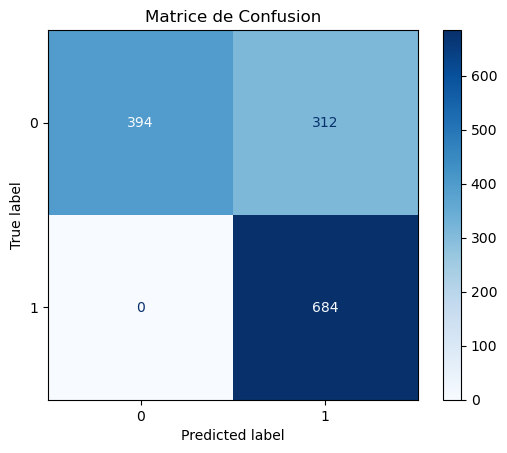

In [212]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques avec une mise en forme claire
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

In [213]:

X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle (version corrigée)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, penalty=None)

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.7763             ║
║ Precision: 0.6874            ║
║ Recall: 1.0000               ║
║ F1-score: 0.8148             ║
║ ROC AUC: 0.7751              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.77      1390



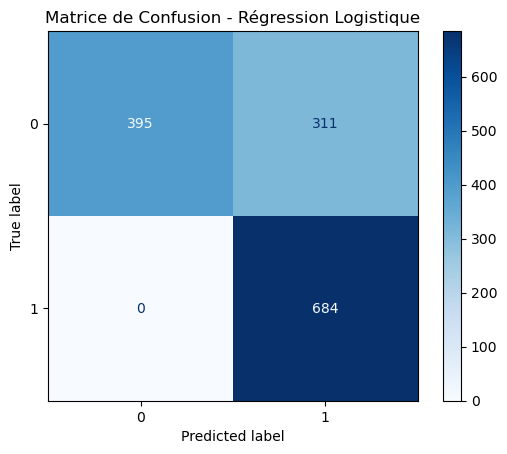

In [215]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()



In [218]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    criterion='gini',
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.7719             ║
║ Precision: 0.6863            ║
║ Recall: 0.9883               ║
║ F1-score: 0.8101             ║
║ ROC AUC: 0.7757              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       0.98      0.56      0.71       706
           1       0.69      0.99      0.81       684

    accuracy                           0.77      1390
   macro avg       0.83      0.78      0.76      1390
weighted avg       0.84      0.77      0.76      1390



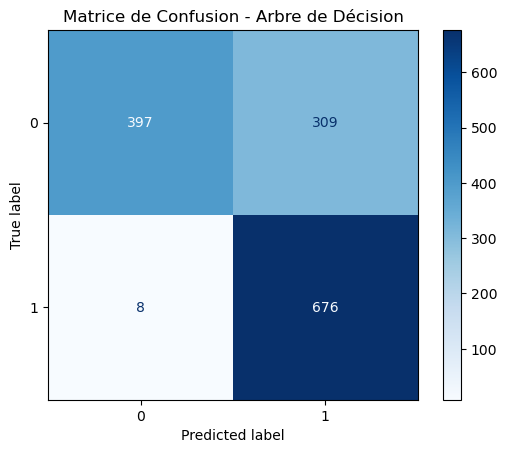


Structure de l'arbre (version texte):
|--- payment_type <= 0.35
|   |--- trip_distance <= 1.59
|   |   |--- trip_distance <= 1.56
|   |   |   |--- class: 1
|   |   |--- trip_distance >  1.56
|   |   |   |--- class: 0
|   |--- trip_distance >  1.59
|   |   |--- RatecodeID <= 11.06
|   |   |   |--- class: 1
|   |   |--- RatecodeID >  11.06
|   |   |   |--- class: 0
|--- payment_type >  0.35
|   |--- class: 0



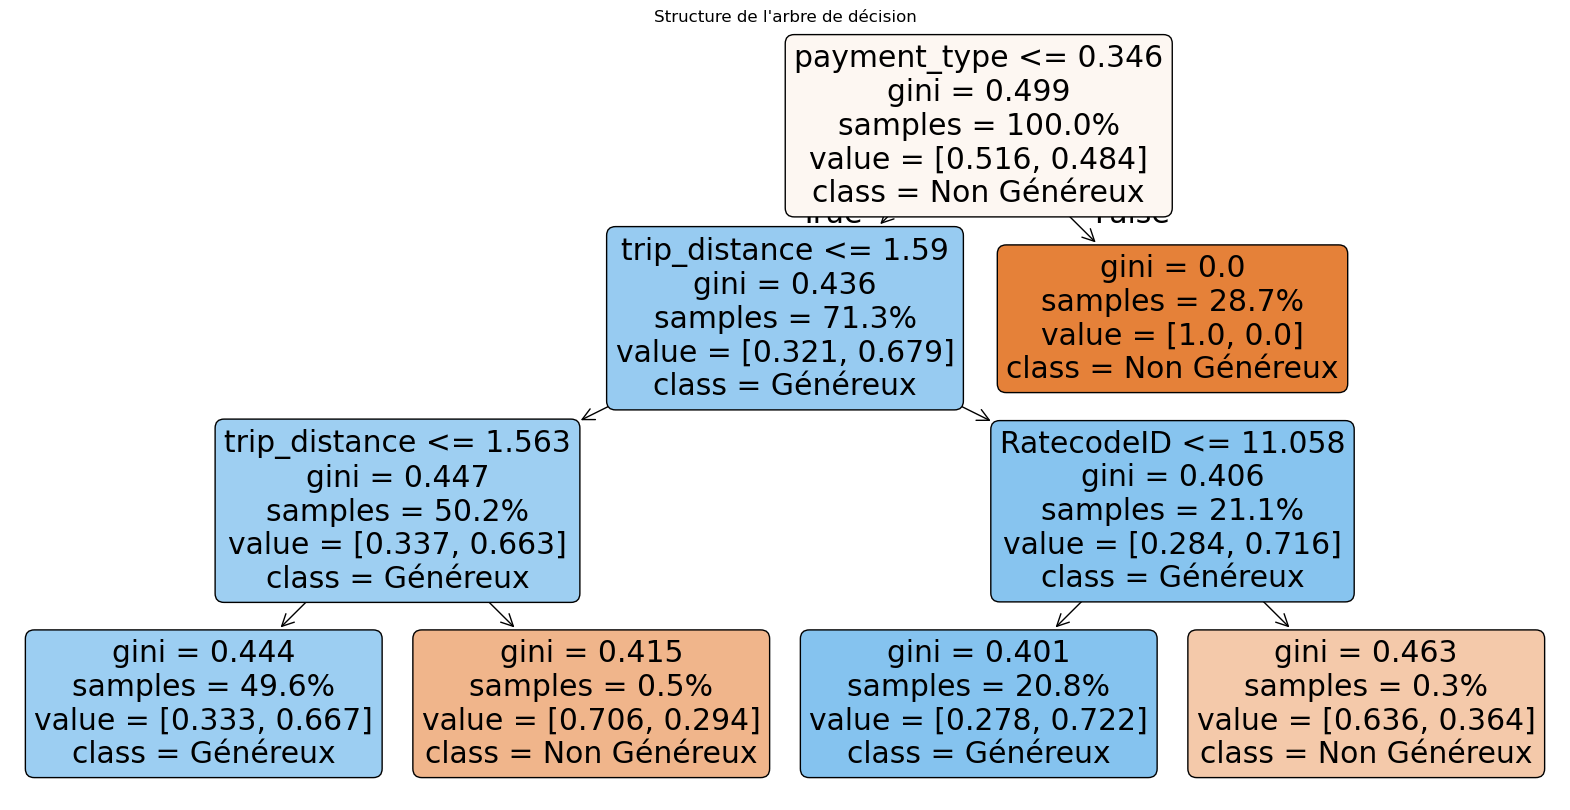

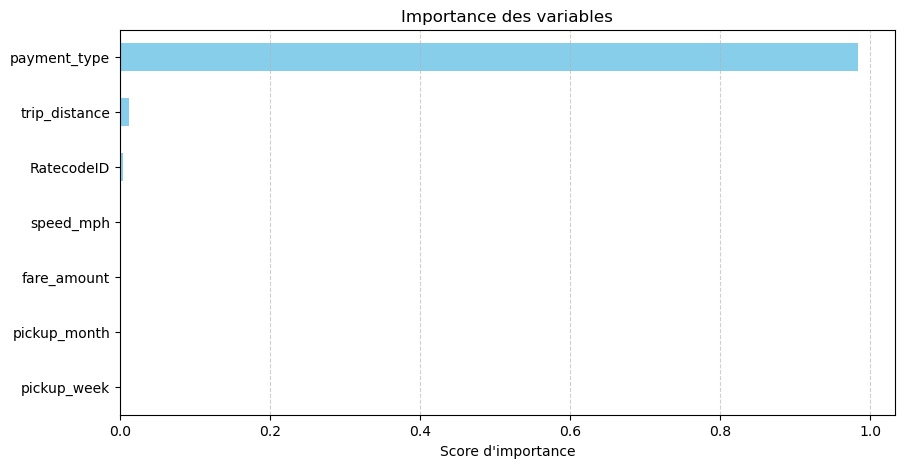

In [221]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non Généreux', 'Généreux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de décision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [222]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Création et entraînement du modèle
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

╔══════════════════════════════╗
║       MÉTRIQUES DU MODÈLE    ║
╠══════════════════════════════╣
║ Accuracy: 0.7763             ║
║ Precision: 0.6874            ║
║ Recall: 1.0000               ║
║ F1-score: 0.8148             ║
║ ROC AUC: 0.7875              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.77      1390



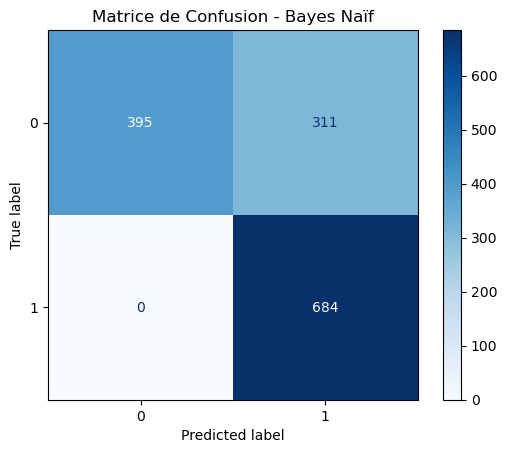

In [223]:
# 4. Évaluation et métriques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔══════════════════════════════╗")
print("║       MÉTRIQUES DU MODÈLE    ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Naïf")
plt.show()

## algorithme KNN

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Préparation des données
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle KNN
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

╔══════════════════════════════╗
║     MÉTRIQUES DU MODÈLE KNN  ║
╠══════════════════════════════╣
║ Accuracy: 0.7353             ║
║ Precision: 0.6804            ║
║ Recall: 0.8713               ║
║ F1-score: 0.7641             ║
║ ROC AUC: 0.7677              ║
╚══════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       706
           1       0.68      0.87      0.76       684

    accuracy                           0.74      1390
   macro avg       0.75      0.74      0.73      1390
weighted avg       0.76      0.74      0.73      1390



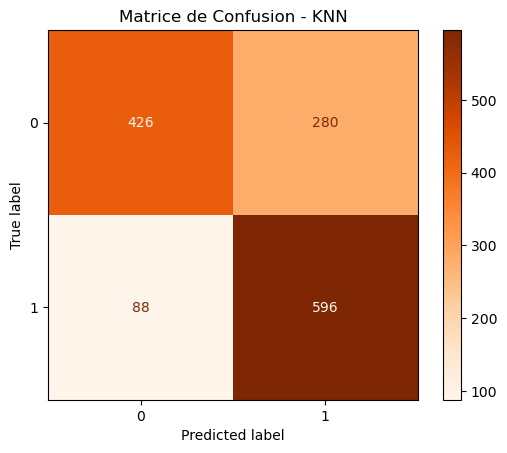

In [299]:

# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔══════════════════════════════╗")
print("║     MÉTRIQUES DU MODÈLE KNN  ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}             ║")
print(f"║ Precision: {precision:.4f}            ║")
print(f"║ Recall: {recall:.4f}               ║")
print(f"║ F1-score: {f1:.4f}             ║")
print(f"║ ROC AUC: {roc_auc:.4f}              ║")
print("╚══════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()


In [301]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

Meilleur K pour KNN: {'n_neighbors': 9}


## algorithme Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier

# 1. Préparation des données
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

╔════════════════════════════════════╗
║ MÉTRIQUES DU MODÈLE RANDOM FOREST  ║
╠════════════════════════════════════╣
║ Accuracy: 0.7468                   ║
║ Precision: 0.6921                  ║
║ Recall: 0.8743                     ║
║ F1-score: 0.7726                   ║
║ ROC AUC: 0.7794                    ║
╚════════════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       706
           1       0.69      0.87      0.77       684

    accuracy                           0.75      1390
   macro avg       0.76      0.75      0.74      1390
weighted avg       0.77      0.75      0.74      1390



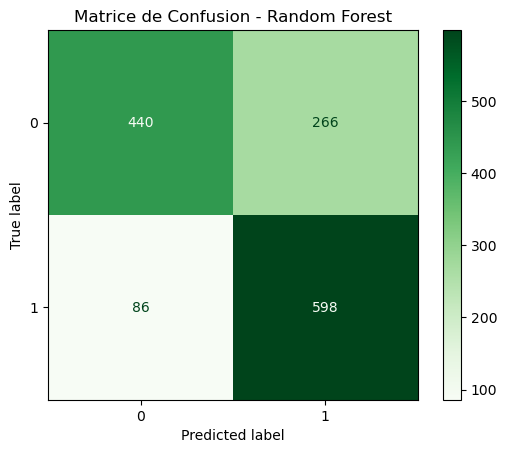

In [237]:
# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU MODÈLE RANDOM FOREST  ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


## reseaux de neurone

In [284]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Préparation des données
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Réseau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

╔════════════════════════════════════╗
║ MÉTRIQUES DU RÉSEAU DE NEURONES    ║
╠════════════════════════════════════╣
║ Accuracy: 0.7755                   ║
║ Precision: 0.6886                  ║
║ Recall: 0.9927                     ║
║ F1-score: 0.8132                   ║
║ ROC AUC: 0.7749                    ║
╚════════════════════════════════════╝

Classification Report détaillé:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72       706
           1       0.69      0.99      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.84      0.78      0.77      1390



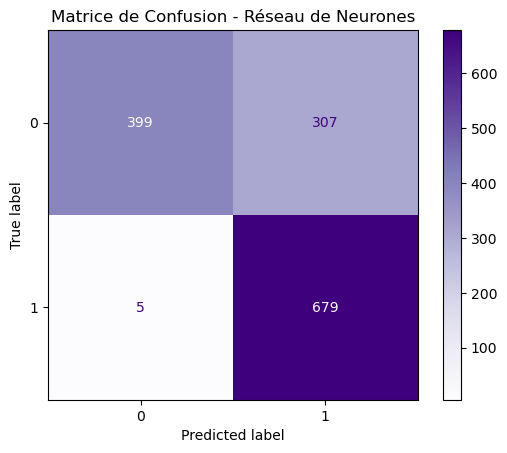

In [285]:

# 4. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des métriques
print("╔════════════════════════════════════╗")
print("║ MÉTRIQUES DU RÉSEAU DE NEURONES    ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy: {accuracy:.4f}                   ║")
print(f"║ Precision: {precision:.4f}                  ║")
print(f"║ Recall: {recall:.4f}                     ║")
print(f"║ F1-score: {f1:.4f}                   ║")
print(f"║ ROC AUC: {roc_auc:.4f}                    ║")
print("╚════════════════════════════════════╝")

print("\nClassification Report détaillé:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - Réseau de Neurones")
plt.show()